# PREDICTION OF FAULTY WATER PUMPS



## Project Background 

This project was conceptualized by **`Taarifa`** as a competitive project among Data Scientists hosted on **`Drivendata platform`**. The project competition can be assessed [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

**`Taarifa`** is a platform that offers business management solutions to clients who find it easy in online data storage, information analysis, and tons of new features. They ensure high data security with ease of access to the administration on all devices. In other words, **`Taarifa`** is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues.

For this project, the data is sourced from the **`Taarifa waterpoints dashboard`**, which aggregates data from the **`Tanzania Ministry of Water.`**

## Problem Statement

This project seeks to build a model that would predicts if a water-pump is functional, or needs some repairs, or totally non-functional. Prediction of one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

The project is a `multi-classification` problem 

The most performing model of all the models will be built will b deployed to production. 

## Project Dataset 

Dataset for this project have two files. 
    - `water-train.csv`: contains all the features
    - `water-label.csv`: contains the label

### Dataset Feature Overview 

The goal is to predict the operating condition of a waterpoint for each record in the dataset. The following set of information will give a background overview about the waterpoint features:

- `amount_tsh` - Total static head (amount water available to waterpoint)
- `date_recorded` - The date the row was entered
- `funder` - Who funded the well
- `gps_height` - Altitude of the well
- `installer` - Organization that installed the well
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `wpt_name` - Name of the waterpoint if there is one
- `num_private` -
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `region` - Geographic location
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)
- `lga` - Geographic location
- `ward` - Geographic location
- `population` - Population around the well
- `public_meeting` - True/False
- `recorded_by` - Group entering this row of data
- `scheme_management` - Who operates the waterpoint
- `scheme_name` - Who operates the waterpoint
- `permit` - If the waterpoint is permitted
- `construction_year` - Year the waterpoint was constructed
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint


## Project Prediction Models 

Since the project problem is a classifier problem, I'll be building three prediction models:
- `Random Forest`
- `Gradient Boosting`: (xgboost)
- `Logistic regression`

The most performing model will be deployed to production.

## Project Tasks Before Building

1. Join the dataset
2. Clean the data when necessary
3. Perform some exploratory data analysis: We will be looking into the data types, data statistics, specific parameters, and variable distributions.
4. Verify the hypothesis of some variables that could be highly correlated to the target variable: if would determine there predictive power
5. Build a base model 
6. Perform feature engineering on some features (e.g date etc.)
7. Start building the models 


## Model Building Outline

1. Splitting the data to:
    - training set 60%
    - validation set 20%
    - testing set 20%
2. Using Random state to be = 1 for all the models
3. Using DictVectorizer to transform the training, validation, and testing sets 
4. Training the data with on all the three Classifier models 
5. Evaluate each model on the validation set
6. Hypertune each model parameters to best performance
7. Choose the best model based on it's performance on validation set
8. Join training and validation sets 
9. Train the best model with the joined dataset
10. Evaluate the model on testing set 
11. Deploy the model

# Project Workflow

##  Importing the libraries

In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# Set plot style
sns.set(color_codes=True)

In [3]:
## View all the columns in the dataframe 

pd.set_option('display.max_columns', None)

## Importing the datasets

Here, we will join the two dataset 

In [4]:
water_train = pd.read_csv('water-train.csv')
water_label = pd.read_csv('water-label.csv')

In [5]:
water_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
water_train.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000.0,0.0,25.0,0.0,0.0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.938093,34.698766,37.460664,38.486161,31.130847
latitude,-9.856322,-2.147466,-3.821329,-11.155298,-1.825359
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [7]:
water_label.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
water_train.shape, water_label.shape

((59400, 40), (59400, 2))

Merging water_train and water_label 

In [9]:
df_one = pd.merge(water_train, water_label, on='id')

In [10]:
df_one.shape

(59400, 41)

In [11]:
df_one.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Data Assessing and Preprocessing

Here, I want to see more information about the dataset, to know where cleaning is needed.

In [12]:
# Checking the duplication of samples 

df_one.duplicated().sum()

0

No duplicated samples

In [13]:
# Checking the info of the data 

df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [14]:
# converting date_recorded to it's correct data type
# datetime datatype

df_one['date_recorded'] = pd.to_datetime(df_one['date_recorded'])


In [15]:
# Checking the datatype again

df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [16]:
df_one

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


A closer look at this data shows that some features with object dtype have their values separated by `spaces`. Going forward, I want to replace these spaces with `_`

In [17]:
# Getting the object features
strings = list(df_one.dtypes[df_one.dtypes == 'object'].index)
strings

['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [18]:
df_one[strings]

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,VWC,Roman,False,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,GeoData Consultants Ltd,Other,NaN,True,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,VWC,NaN,True,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,NaN,NaN,True,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,VWC,NaN,False,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,GeoData Consultants Ltd,VWC,NaN,True,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


I want to get features that have missing values 

In [19]:
df_one[strings].isna().sum()

funder                    3635
installer                 3655
wpt_name                     0
basin                        0
subvillage                 371
region                       0
lga                          0
ward                         0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
dtype: int64

In [20]:
str_features_with_nan = ['funder', 'installer', 'subvillage', 'public_meeting', 
                         'scheme_management', 'scheme_name',  'permit']

str_features_with_no_missing_value = ['wpt_name', 'basin','region','lga','ward','recorded_by',
                                      'extraction_type','extraction_type_group','extraction_type_class',
                                      'management','management_group','payment','payment_type',
                                      'water_quality','quality_group','quantity','quantity_group',
                                      'source','source_type','source_class','waterpoint_type',
                                      'waterpoint_type_group','status_group']

In [21]:
# Looping through the values to remove the spaces with _
# First, I will turn every value to lower case before replacement of spaces
# This will be done on the features that have no missing values 

for col in str_features_with_no_missing_value:
    df_one[col] = df_one[col].astype(str).str.lower().str.replace(' ', '_')

In [22]:
df_one[str_features_with_no_missing_value]

,wpt_name,basin,region,lga,ward,recorded_by,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,none,lake_nyasa,iringa,ludewa,mundindi,geodata_consultants_ltd,gravity,gravity,gravity,vwc,user-group,pay_annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal_standpipe,communal_standpipe,functional
1,zahanati,lake_victoria,mara,serengeti,natta,geodata_consultants_ltd,gravity,gravity,gravity,wug,user-group,never_pay,never_pay,soft,good,insufficient,insufficient,rainwater_harvesting,rainwater_harvesting,surface,communal_standpipe,communal_standpipe,functional
2,kwa_mahundi,pangani,manyara,simanjiro,ngorika,geodata_consultants_ltd,gravity,gravity,gravity,vwc,user-group,pay_per_bucket,per_bucket,soft,good,enough,enough,dam,dam,surface,communal_standpipe_multiple,communal_standpipe,functional
3,zahanati_ya_nanyumbu,ruvuma_/_southern_coast,mtwara,nanyumbu,nanyumbu,geodata_consultants_ltd,submersible,submersible,submersible,vwc,user-group,never_pay,never_pay,soft,good,dry,dry,machine_dbh,borehole,groundwater,communal_standpipe_multiple,communal_standpipe,non_functional
4,shuleni,lake_victoria,kagera,karagwe,nyakasimbi,geodata_consultants_ltd,gravity,gravity,gravity,other,other,never_pay,never_pay,soft,good,seasonal,seasonal,rainwater_harvesting,rainwater_harvesting,surface,communal_standpipe,communal_standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,area_three_namba_27,pangani,kilimanjaro,hai,masama_magharibi,geodata_consultants_ltd,gravity,gravity,gravity,water_board,user-group,pay_per_bucket,per_bucket,soft,good,enough,enough,spring,spring,groundwater,communal_standpipe,communal_standpipe,functional
59396,kwa_yahona_kuvala,rufiji,iringa,njombe,ikondo,geodata_consultants_ltd,gravity,gravity,gravity,vwc,user-group,pay_annually,annually,soft,good,enough,enough,river,river/lake,surface,communal_standpipe,communal_standpipe,functional
59397,mashine,rufiji,mbeya,mbarali,chimala,geodata_consultants_ltd,swn_80,swn_80,handpump,vwc,user-group,pay_monthly,monthly,fluoride,fluoride,enough,enough,machine_dbh,borehole,groundwater,hand_pump,hand_pump,functional
59398,mshoro,rufiji,dodoma,chamwino,mvumi_makulu,geodata_consultants_ltd,nira/tanira,nira/tanira,handpump,vwc,user-group,never_pay,never_pay,soft,good,insufficient,insufficient,shallow_well,shallow_well,groundwater,hand_pump,hand_pump,functional


In [23]:
df_one.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,lake_nyasa,Mnyusi B,iringa,11,5,ludewa,mundindi,109,True,geodata_consultants_ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay_annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal_standpipe,communal_standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,zahanati,0,lake_victoria,Nyamara,mara,20,2,serengeti,natta,280,NaN,geodata_consultants_ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never_pay,never_pay,soft,good,insufficient,insufficient,rainwater_harvesting,rainwater_harvesting,surface,communal_standpipe,communal_standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,kwa_mahundi,0,pangani,Majengo,manyara,21,4,simanjiro,ngorika,250,True,geodata_consultants_ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay_per_bucket,per_bucket,soft,good,enough,enough,dam,dam,surface,communal_standpipe_multiple,communal_standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,zahanati_ya_nanyumbu,0,ruvuma_/_southern_coast,Mahakamani,mtwara,90,63,nanyumbu,nanyumbu,58,True,geodata_consultants_ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never_pay,never_pay,soft,good,dry,dry,machine_dbh,borehole,groundwater,communal_standpipe_multiple,communal_standpipe,non_functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,shuleni,0,lake_victoria,Kyanyamisa,kagera,18,1,karagwe,nyakasimbi,0,True,geodata_consultants_ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never_pay,never_pay,soft,good,seasonal,seasonal,rainwater_harvesting,rainwater_harvesting,surface,communal_standpipe,communal_standpipe,functional


From the above output, it shows clearly that there are seven features with missing data. 

I want to investigate further on the features that have missing data 

**`features with missing values:`**
- funder
- installer
- subvillage
- public_meeting
- scheme_management
- scheme_name
- permit

In [24]:
# Checking the value count of each variable using for loop

for cat in strings:
    print(cat)
    print(df_one[cat].value_counts())
    print()

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Germany Cristians            1
Nyangere                     1
Team Rafiki                  1
Tareto                       1
Seleman Seif                 1
Name: funder, Length: 1897, dtype: int64

installer
DWE                      17402
Government                1825
RWE                       1206
Commu                     1060
DANIDA                    1050
                         ...  
Jafary Mbaga                 1
OLOMOLOKI                    1
Rotary club Australia        1
DWW                          1
Mzee Smith                   1
Name: installer, Length: 2145, dtype: int64

wpt_name
none                             3565
shuleni                          1748
zahanati                          830
msikitini                         535
kanisani                          323
               

Checking through the categories of `funder feature`, I can see that it's length runs above 1000. To solve this, I will group any category that it's count is below 500 as `others` to at least reduce the sparsity of the data (i.e reducing cases where there would be too much 0's than 1's).

I will also follow the same tragetory for other feature categories and solve accordingly. 

But first, I will filling the missing values in all the variables that have missing values. 

I want the check the percentage of missing values in the variables

In [25]:
# find the variables with missing observations
# where percentage of missing data is higher than 0

vars_with_na = [var for var in df_one.columns if df_one[var].isnull().mean() > 0]

vars_with_na

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

It's only category variables that have missing data 

In [26]:
df_one[vars_with_na].head(10)

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
5,Mkinga Distric Coun,DWE,Moa/Mwereme,True,VWC,Zingibali,True
6,Dwsp,DWSP,Ishinabulandi,True,VWC,NaN,True
7,Rwssp,DWE,Nyawishi Center,True,NaN,NaN,True
8,Wateraid,Water Aid,Imalauduki,True,VWC,NaN,True
9,Isingiro Ho,Artisan,Mkonomre,True,NaN,NaN,True


In [27]:
# I want to find out the percentage of observations missing
# per variable

# calculate the percentage of missing data
df_na = df_one[vars_with_na].isnull().mean()

# transforming the array into a dataframe 
df_na = pd.DataFrame(df_na.reset_index())

# add column names to the dataframe 
df_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
df_na.sort_values(by='na_percentage', ascending=False, inplace=True)
df_na

,variable,na_percentage
5,scheme_name,0.474175
4,scheme_management,0.065269
1,installer,0.061532
0,funder,0.061195
3,public_meeting,0.056128
6,permit,0.051448
2,subvillage,0.006246


To solve the missing values, I will be using different techniques. 

First, I will look at `Complete Case Analysis (CCA)`. CCA talks about discarding observations that have missing data. Where I will be looking at is variable that have less 5% of missing values. It's only `subvillage feature` that have less than 5% missing values. So, I will use CCA techniques. 

In [28]:
# copy the dataframe 

df_new = df_one.copy()

In [29]:
df_new = df_new.dropna(subset=['subvillage'])
df_new[vars_with_na].isnull().sum()

funder                3635
installer             3655
subvillage               0
public_meeting        3333
scheme_management     3869
scheme_name          28157
permit                3056
dtype: int64

To solve the remaining variables with missing values, I will be dealing with them using different techniques. 

**funder, scheme_management, installer, public_meeting,	and permit**

Since we have significant number of missing values in these categories, I will be treating the missing values as separate category in each feature. To do this, I will be using `arbitrary value imputation`. The value to be imputed will be regarded as `missing`. This will be done on three features 

Both **`public_meeting and permit`** will be dealt with using `frequent category imputation`. i.e I will filling the missing values with the mode of the categories. 

In [30]:
# checking the % of missing values 
var_na = ['funder', 'scheme_management', 'installer', 'public_meeting', 'permit']
for var in var_na:
    print(var)
    print(round(df_new[var].isnull().mean(), 3))

funder
0.062
scheme_management
0.066
installer
0.062
public_meeting
0.056
permit
0.052


In [31]:
# filling the missing values

df_new['funder'].fillna('missing', inplace=True)
df_new['scheme_management'].fillna('missing', inplace=True)
df_new['installer'].fillna('missing', inplace=True)
df_new['public_meeting'].fillna('true', inplace=True)
df_new['permit'].fillna('true', inplace=True)

In [32]:
df_new[var_na].isnull().sum()

funder               0
scheme_management    0
installer            0
public_meeting       0
permit               0
dtype: int64

I'll pause the handling of missing values of `scheme_name` till later. As investigation progresses to building the models, this will be done. 

For now, I want to replace spaces with "_" in the features that were not cleaned earlier 

In [33]:
to_clean = ['funder', 'scheme_management', 'installer', 'public_meeting', 'permit', 'subvillage']
for col in to_clean:
    df_new[col] = df_new[col].astype(str).str.lower().str.replace(' ', '_')

In [34]:
df_new.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,none,0,lake_nyasa,mnyusi_b,iringa,11,5,ludewa,mundindi,109,true,geodata_consultants_ltd,vwc,Roman,false,1999,gravity,gravity,gravity,vwc,user-group,pay_annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal_standpipe,communal_standpipe,functional
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,zahanati,0,lake_victoria,nyamara,mara,20,2,serengeti,natta,280,true,geodata_consultants_ltd,other,NaN,true,2010,gravity,gravity,gravity,wug,user-group,never_pay,never_pay,soft,good,insufficient,insufficient,rainwater_harvesting,rainwater_harvesting,surface,communal_standpipe,communal_standpipe,functional
2,34310,25.0,2013-02-25,lottery_club,686,world_vision,37.460664,-3.821329,kwa_mahundi,0,pangani,majengo,manyara,21,4,simanjiro,ngorika,250,true,geodata_consultants_ltd,vwc,Nyumba ya mungu pipe scheme,true,2009,gravity,gravity,gravity,vwc,user-group,pay_per_bucket,per_bucket,soft,good,enough,enough,dam,dam,surface,communal_standpipe_multiple,communal_standpipe,functional
3,67743,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,zahanati_ya_nanyumbu,0,ruvuma_/_southern_coast,mahakamani,mtwara,90,63,nanyumbu,nanyumbu,58,true,geodata_consultants_ltd,vwc,NaN,true,1986,submersible,submersible,submersible,vwc,user-group,never_pay,never_pay,soft,good,dry,dry,machine_dbh,borehole,groundwater,communal_standpipe_multiple,communal_standpipe,non_functional
4,19728,0.0,2011-07-13,action_in_a,0,artisan,31.130847,-1.825359,shuleni,0,lake_victoria,kyanyamisa,kagera,18,1,karagwe,nyakasimbi,0,true,geodata_consultants_ltd,missing,NaN,true,0,gravity,gravity,gravity,other,other,never_pay,never_pay,soft,good,seasonal,seasonal,rainwater_harvesting,rainwater_harvesting,surface,communal_standpipe,communal_standpipe,functional


I want to investigate further on the category variables 

In [35]:
df_new[strings]

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,roman,roman,none,lake_nyasa,mnyusi_b,iringa,ludewa,mundindi,true,geodata_consultants_ltd,vwc,Roman,false,gravity,gravity,gravity,vwc,user-group,pay_annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal_standpipe,communal_standpipe,functional
1,grumeti,grumeti,zahanati,lake_victoria,nyamara,mara,serengeti,natta,true,geodata_consultants_ltd,other,NaN,true,gravity,gravity,gravity,wug,user-group,never_pay,never_pay,soft,good,insufficient,insufficient,rainwater_harvesting,rainwater_harvesting,surface,communal_standpipe,communal_standpipe,functional
2,lottery_club,world_vision,kwa_mahundi,pangani,majengo,manyara,simanjiro,ngorika,true,geodata_consultants_ltd,vwc,Nyumba ya mungu pipe scheme,true,gravity,gravity,gravity,vwc,user-group,pay_per_bucket,per_bucket,soft,good,enough,enough,dam,dam,surface,communal_standpipe_multiple,communal_standpipe,functional
3,unicef,unicef,zahanati_ya_nanyumbu,ruvuma_/_southern_coast,mahakamani,mtwara,nanyumbu,nanyumbu,true,geodata_consultants_ltd,vwc,NaN,true,submersible,submersible,submersible,vwc,user-group,never_pay,never_pay,soft,good,dry,dry,machine_dbh,borehole,groundwater,communal_standpipe_multiple,communal_standpipe,non_functional
4,action_in_a,artisan,shuleni,lake_victoria,kyanyamisa,kagera,karagwe,nyakasimbi,true,geodata_consultants_ltd,missing,NaN,true,gravity,gravity,gravity,other,other,never_pay,never_pay,soft,good,seasonal,seasonal,rainwater_harvesting,rainwater_harvesting,surface,communal_standpipe,communal_standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,germany_republi,ces,area_three_namba_27,pangani,kiduruni,kilimanjaro,hai,masama_magharibi,true,geodata_consultants_ltd,water_board,Losaa Kia water supply,true,gravity,gravity,gravity,water_board,user-group,pay_per_bucket,per_bucket,soft,good,enough,enough,spring,spring,groundwater,communal_standpipe,communal_standpipe,functional
59396,cefa-njombe,cefa,kwa_yahona_kuvala,rufiji,igumbilo,iringa,njombe,ikondo,true,geodata_consultants_ltd,vwc,Ikondo electrical water sch,true,gravity,gravity,gravity,vwc,user-group,pay_annually,annually,soft,good,enough,enough,river,river/lake,surface,communal_standpipe,communal_standpipe,functional
59397,missing,missing,mashine,rufiji,madungulu,mbeya,mbarali,chimala,true,geodata_consultants_ltd,vwc,NaN,false,swn_80,swn_80,handpump,vwc,user-group,pay_monthly,monthly,fluoride,fluoride,enough,enough,machine_dbh,borehole,groundwater,hand_pump,hand_pump,functional
59398,malec,musa,mshoro,rufiji,mwinyi,dodoma,chamwino,mvumi_makulu,true,geodata_consultants_ltd,vwc,NaN,true,nira/tanira,nira/tanira,handpump,vwc,user-group,never_pay,never_pay,soft,good,insufficient,insufficient,shallow_well,shallow_well,groundwater,hand_pump,hand_pump,functional


In [36]:
# Checking the value count of each variable using for loop

for cat in strings:
    print(cat)
    print(df_new[cat].value_counts())
    print()

funder
government_of_tanzania    9014
missing                   3635
danida                    3114
hesawa                    2200
rwssp                     1374
                          ... 
kipo_potry                   1
umoja                        1
mwakifuna                    1
rudep/norad                  1
sido                         1
Name: funder, Length: 1895, dtype: int64

installer
dwe               17364
missing            3655
government         1891
hesawa             1395
rwe                1205
                  ...  
justine_marwa         1
arab_community        1
twig                  1
dwe_/tassaf           1
dew                   1
Name: installer, Length: 1926, dtype: int64

wpt_name
none                             3561
shuleni                          1714
zahanati                          811
msikitini                         533
kanisani                          313
                                 ... 
mashaja_venasi                      1
shule_ya_msingi_

In [37]:
df_new.wpt_name.value_counts()[:50]

none                 3561
shuleni              1714
zahanati              811
msikitini             533
kanisani              313
bombani               271
sokoni                259
ofisini               248
school                204
shule_ya_msingi       198
shule                 152
sekondari             146
muungano              133
mkombozi              111
madukani              103
mbugani                93
upendo                 93
hospital               91
kituo_cha_afya         90
mkuyuni                87
umoja                  84
center                 83
ccm                    80
mtakuja                76
ofisi_ya_kijiji        76
kisimani               70
tankini                69
bwawani                66
songambele             66
maendeleo              64
bondeni                61
mbuyuni                59
uwanjani               55
kilabuni               55
mnadani                51
kijiweni               50
secondary              49
miembeni               48
amani       

In [38]:
df_new.lga.value_counts()[:50]

njombe              2503
arusha_rural        1252
moshi_rural         1251
bariadi             1177
rungwe              1106
kilosa              1094
kasulu              1047
mbozi               1034
meru                1009
bagamoyo             997
singida_rural        995
kilombero            959
same                 877
kibondo              874
kyela                859
kahama               836
kigoma_rural         824
magu                 824
maswa                809
karagwe              771
mbinga               750
iringa_rural         728
serengeti            716
namtumbo             694
lushoto              694
songea_rural         693
mpanda               679
mvomero              671
ngara                669
ulanga               665
makete               630
kwimba               627
mbarali              626
hai                  625
rombo                594
shinyanga_rural      588
nzega                575
ludewa               564
mkuranga             560
iramba               544


In [39]:
df_new.ward.value_counts()[:50]

igosi               307
imalinyi            252
siha_kati           232
mdandu              231
nduruma             217
mishamo             203
kitunda             203
msindo              201
chalinze            196
maji_ya_chai        190
usuka               187
ngarenanyuki        172
chanika             171
vikindu             162
mtwango             153
matola              145
zinga/ikerege       141
maramba             139
wanging'ombe        139
itete               137
magomeni            135
kikatiti            134
ifakara             134
olkokola            133
maposeni            130
mvomero             129
igongolo            129
mlangali            125
nkoma               122
mahongole           121
nkungulu            121
rujewa              120
simbo               118
masama_magharibi    116
kiranyi             115
mamire              115
kidatu              114
lupalilo            114
kagongo             113
ihanda              113
hedaru              112
chinamili       

I want to investigate both `region_code and district_code`

In [40]:
df_new.region_code.nunique() == df_new.district_code.nunique()

False

In [41]:
df_new.region_code.nunique()

27

In [42]:
df_new.district_code.nunique()

20

In [43]:
df_new.region_code.value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3037
2     3024
16    2816
10    2640
4     2513
13    2093
14    1979
20    1969
1     1840
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [44]:
df_new.district_code.value_counts()

1     12193
2     11173
3      9637
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

Investigating `construction_year`

In [45]:
df_new.construction_year.nunique()

55

In [46]:
df_new.construction_year.value_counts()

0       20348
2010     2644
2008     2613
2009     2533
2000     2091
2007     1586
2006     1471
2003     1286
2011     1254
2004     1123
2012     1084
2002     1075
1978     1037
1995     1013
2005     1009
1999      978
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      707
1974      676
1997      644
1992      640
1993      608
2001      539
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

The most frequent year value does not represent the exact year (where year = 0), and it takes the large chunk of the frequency. To solve this, I will build a predictive `linear regression model` to predict at least the closer year. This will be done this later on. 

## Exploratory Data Analysis 

Here, I will be doing deeper analysis on each variable against the target variable

**Numerical Variables**

### Insight 1

**What is the percentage of distribution of the target variable?** 

This helps to know the percentage of water-pumps that functioning, that need repair, and are totally damaged.

target variable is **`status_group`**

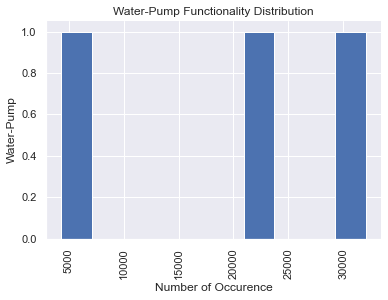

In [47]:
# Checking the data distribution for status_group variable 
# Visualizing the data distribution for each rating  

df_new.status_group.value_counts().plot(kind='hist')
plt.xlabel("Number of Occurence",
            fontsize = 12)
plt.ylabel("Water-Pump",
          fontsize = 12)
plt.title('Water-Pump Functionality Distribution',
         fontsize = 12)
plt.xticks(rotation='vertical')
sns.despine();

Defining functions for visualizations

In [48]:
df_new.status_group.value_counts()

functional                 32054
non_functional             22659
functional_needs_repair     4316
Name: status_group, dtype: int64

In [49]:
def plot_stacked_bars(dataframe, title_, size_=(15, 8), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Functional", "Functional_needs_repair", "Non_functional"], loc=legend_)
    # Labels
    plt.ylabel("Water-pump (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
        
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of water-pump status
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Functional": dataframe[dataframe["status_group"]=="functional"][column],
                         "Functional_needs_repair":dataframe[dataframe["status_group"]=="functional_needs_repair"][column],
                         "Non_functional": dataframe[dataframe["status_group"]=="non_functional"][column]})
    # Plot the histogram
    temp[["Functional", "Functional_needs_repair", "Non_functional"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

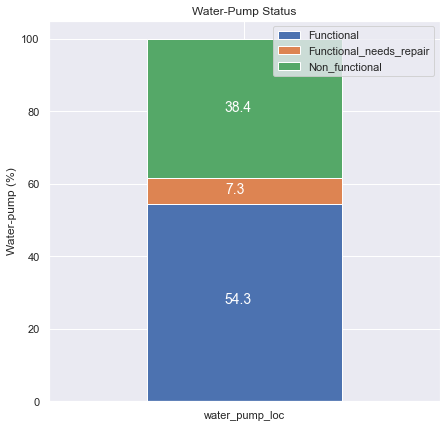

In [50]:
function = df_one[['id', 'status_group']]
function.columns = ['water_pump_loc', 'status_group']
function_total = function.groupby(function['status_group']).count()
function_percentage = function_total / function_total.sum() * 100
plot_stacked_bars(function_percentage.transpose(), "Water-Pump Status", (7, 7), legend_="upper right")

    There is imbalance in the target variable. We have large percentage of water-pump that are not functioning and the larger part are functioning as against small segement of it that needs repair.

In [51]:
df_new.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59029.000000,59029.000000,59029.000000,59029.000000,5.902900e+04,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000
mean,37126.674956,319.646832,672.299582,34.062263,-5.704219e+00,0.477121,15.383811,5.646614,180.941097,1308.488048
std,21455.814250,3006.873793,693.281914,6.585080,2.954644e+00,12.274565,17.606846,9.661485,472.709908,949.095754
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18533.000000,0.000000,0.000000,33.079614,-8.563705e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37077.000000,0.000000,377.000000,34.889047,-5.000106e+00,0.000000,12.000000,3.000000,30.000000,1986.000000
75%,55671.000000,25.000000,1322.000000,37.189623,-3.323780e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Insight 2
**Find data distribution for numerical varialbles as against `status_group`**

**Look out for Outliers in the numerical variables as against target variable `status_group`**

Numerical variables to look at are:
- amount_tsh
- gps_height
- num_private
- region_code
- district_code
- population
- construction_year

**`Note`:** longitude and latitude features will not be added 

In [52]:
num_var_df = df_new[['amount_tsh', 'gps_height', 'num_private', 'region_code', 'district_code',
           'population', 'construction_year',  'status_group']]

num_var_df.head()

,amount_tsh,gps_height,num_private,region_code,district_code,population,construction_year,status_group
0,6000.0,1390,0,11,5,109,1999,functional
1,0.0,1399,0,20,2,280,2010,functional
2,25.0,686,0,21,4,250,2009,functional
3,0.0,263,0,90,63,58,1986,non_functional
4,0.0,0,0,18,1,0,0,functional


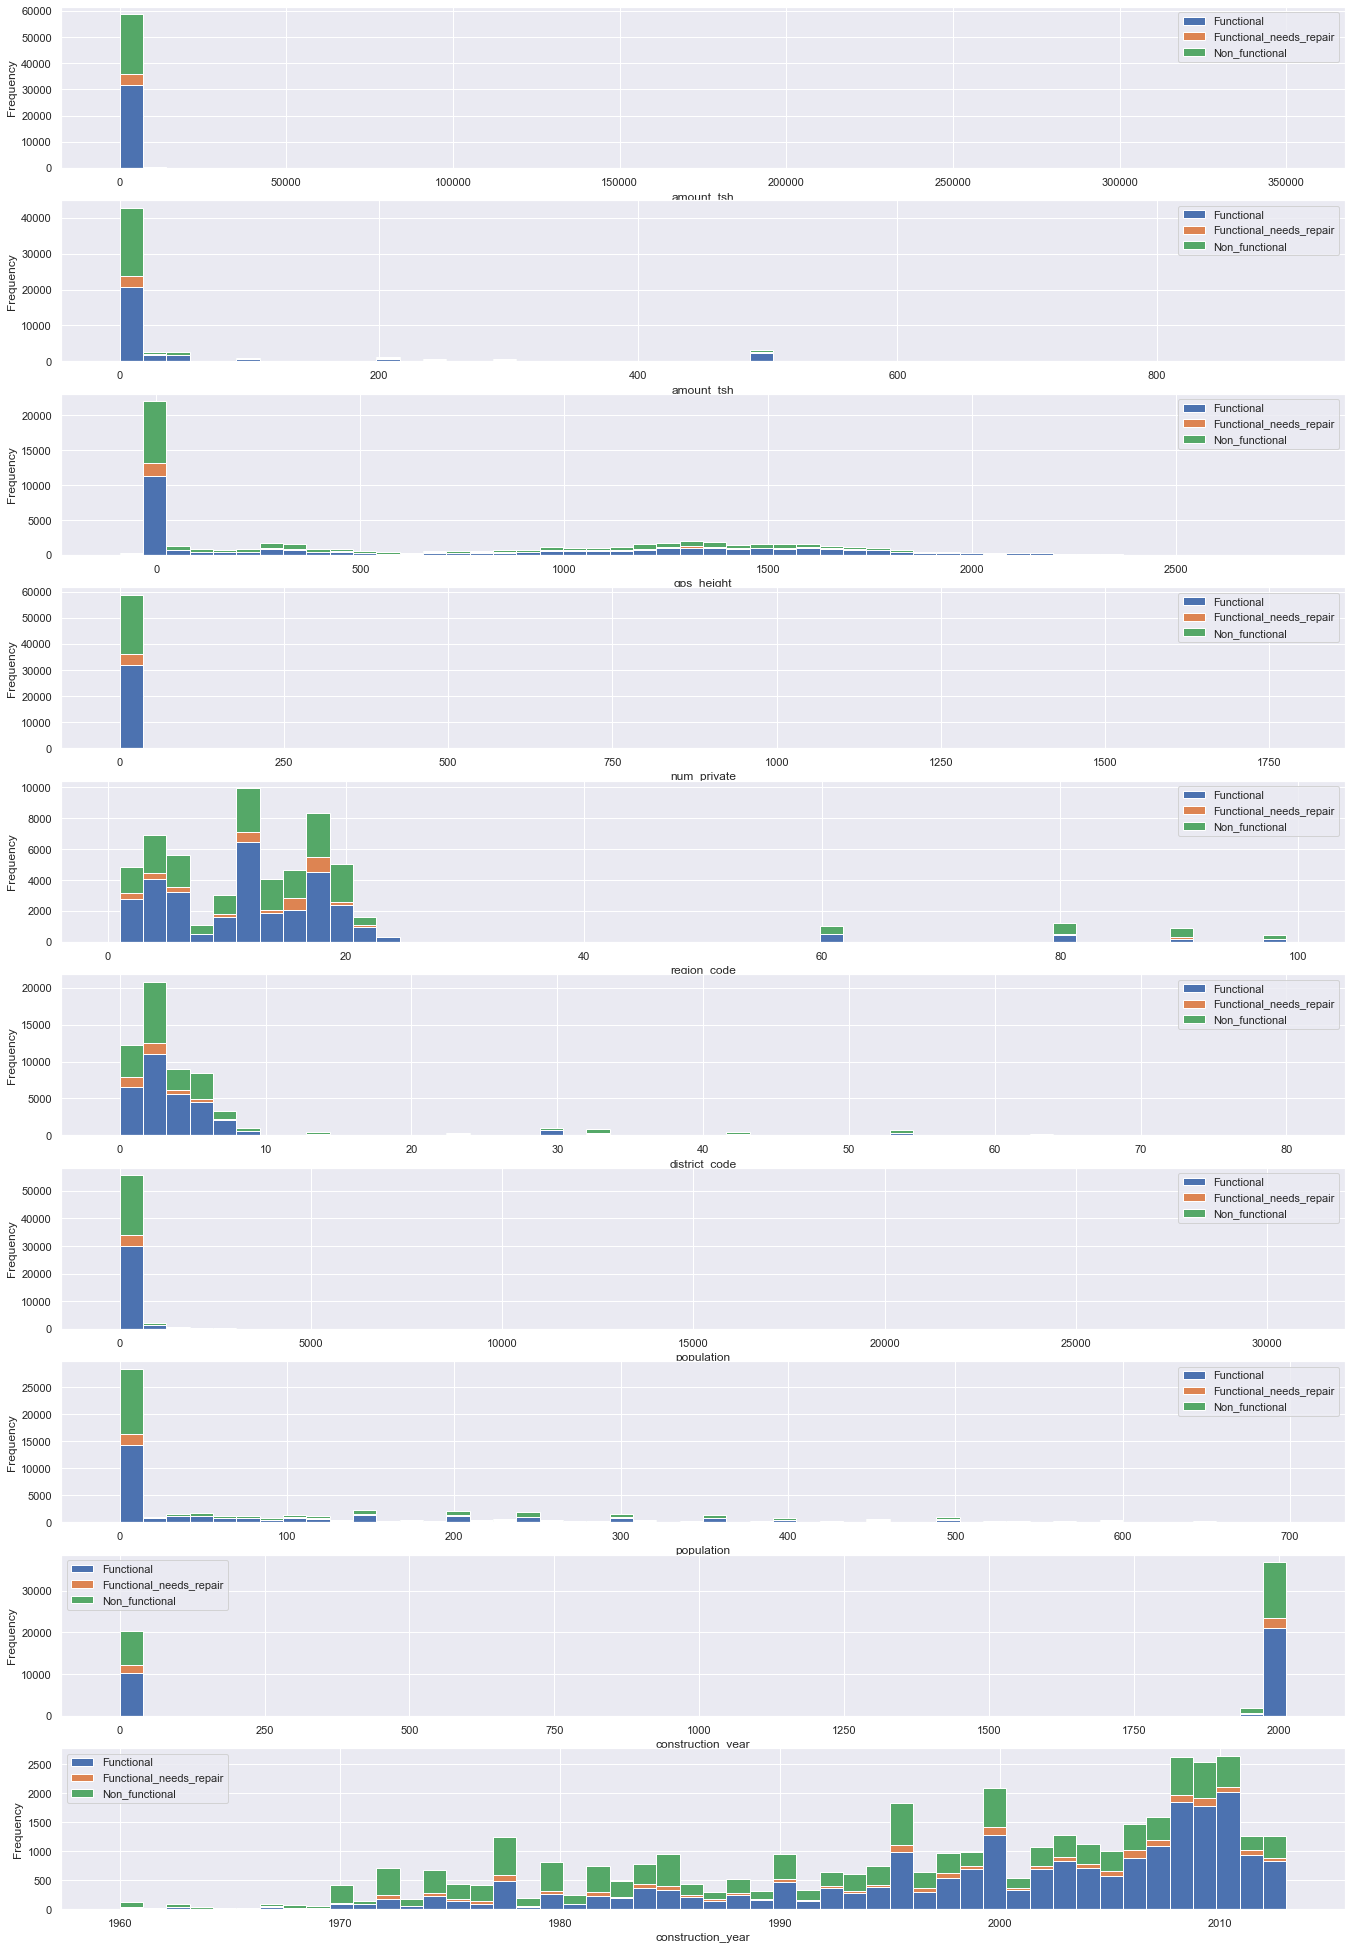

In [53]:
# Using the plot_distribution function 

fig, axs = plt.subplots(nrows=10, figsize=(23, 35))

plot_distribution(num_var_df, 'amount_tsh', axs[0])
# Checking amount of water below 10000
plot_distribution(num_var_df[num_var_df['amount_tsh'] < 1000], 'amount_tsh', axs[1])

plot_distribution(num_var_df, 'gps_height', axs[2])
plot_distribution(num_var_df, 'num_private', axs[3])
plot_distribution(num_var_df, 'region_code', axs[4])
plot_distribution(num_var_df, 'district_code', axs[5])
plot_distribution(num_var_df, 'population', axs[6])
# Checking location population below 2000
plot_distribution(num_var_df[num_var_df['population'] < 700], 'population', axs[7])

plot_distribution(num_var_df, 'construction_year', axs[8])

# Checking contruction year above 0
plot_distribution(num_var_df[num_var_df['construction_year'] > 0], 'construction_year', axs[9])

`Verdict from the above visual:`

- Judging from the above visual distribution of numeric variables, it shows clearly that most of the variables are highly skewed. To do: 

    - Some of the variables will need transformation to show a clear distribution 
    - Box plot will be introduced to show the outliers in the dataset 

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

<AxesSubplot:xlabel='population'>

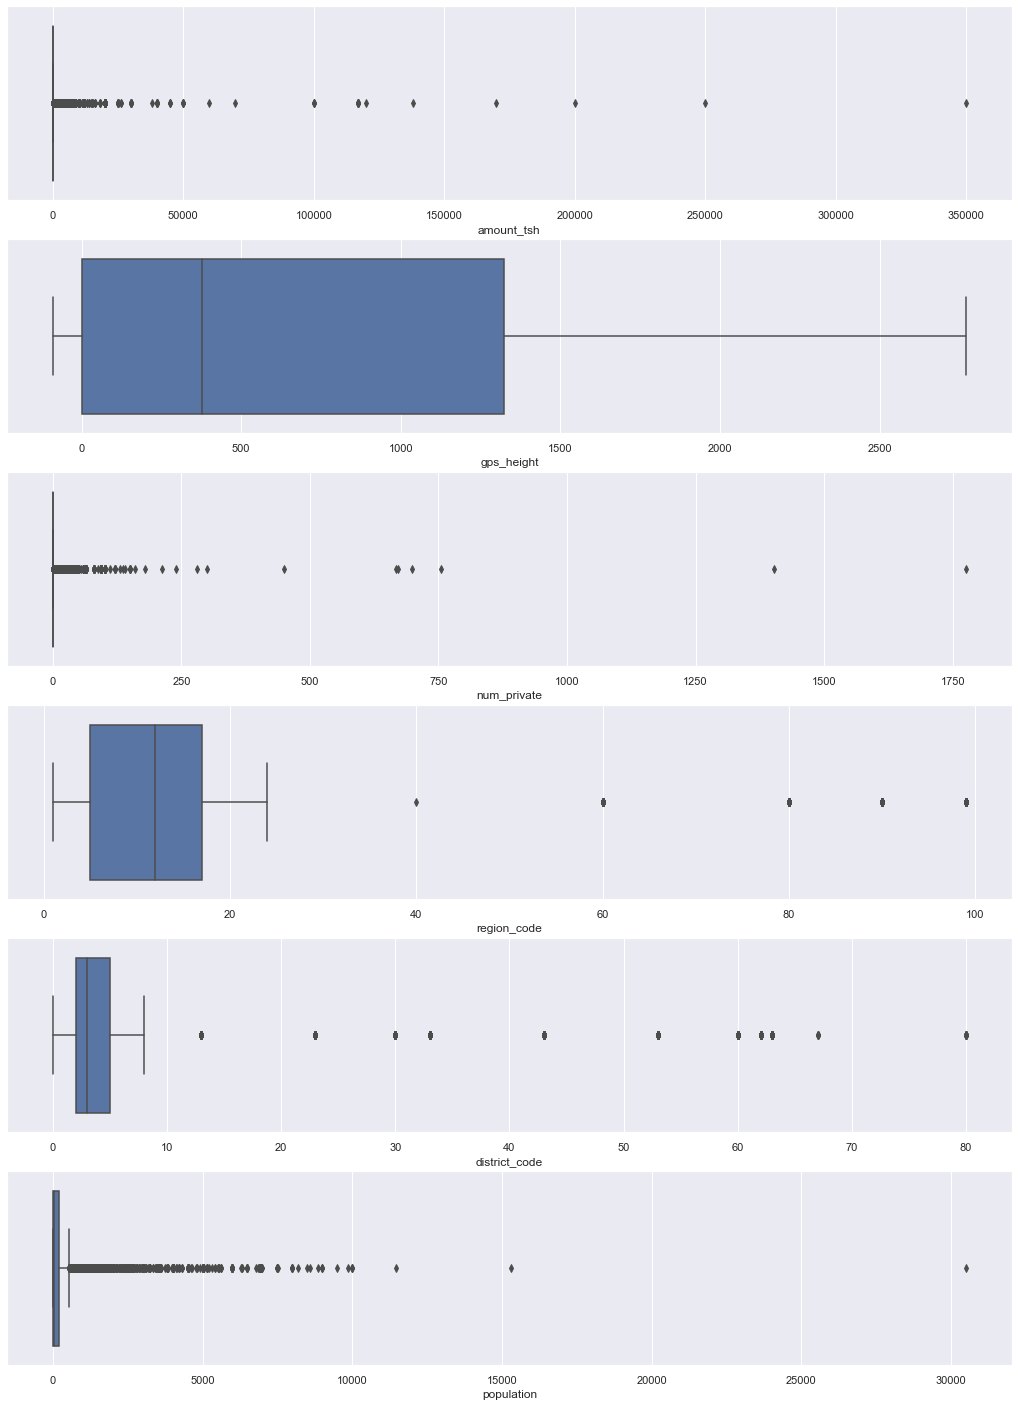

In [54]:
fig, axs = plt.subplots(nrows=6, figsize=(18,25))

# Plotting the boxplot 
sns.boxplot(num_var_df["amount_tsh"], ax=axs[0])
sns.boxplot(num_var_df["gps_height"], ax=axs[1])
sns.boxplot(num_var_df["num_private"], ax=axs[2])
sns.boxplot(num_var_df["region_code"], ax=axs[3])
sns.boxplot(num_var_df["district_code"], ax=axs[4])
sns.boxplot(num_var_df["population"], ax=axs[5])

Investigating further on some variables that have huge presence of outliers. I will be looking at;
   - amount_tsh
   - num_private
   - population

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population'>

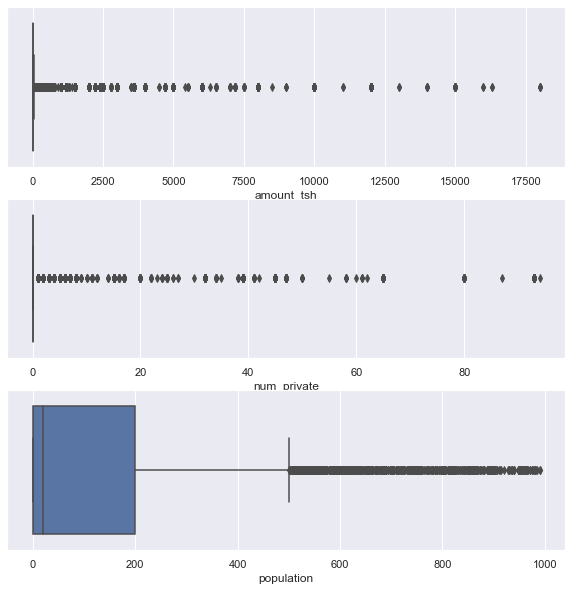

In [55]:
amt_20000 = num_var_df[num_var_df["amount_tsh"] < 20000]
num_priv_100 = num_var_df[num_var_df["num_private"] < 100]
pop_1000 = num_var_df[num_var_df["population"] < 1000]

fig, axs = plt.subplots(nrows=3, figsize=(10,10))

# Plotting the boxplot 
sns.boxplot(amt_20000['amount_tsh'], ax=axs[0])
sns.boxplot(num_priv_100['num_private'], ax=axs[1])
sns.boxplot(pop_1000['population'], ax=axs[2])

I want to transform the variables using `log transformation`

**Transforming Numerical Variables**

<b>Note:</b> We cannot apply log to a value of 0, so I will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [56]:
df_new2 = df_new.copy()

In [57]:
# Skewed variables

skewed = ['amount_tsh', 'gps_height', 'num_private', 'region_code', 'district_code','population']

df_new2[skewed].describe()

,amount_tsh,gps_height,num_private,region_code,district_code,population
count,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000
mean,319.646832,672.299582,0.477121,15.383811,5.646614,180.941097
std,3006.873793,693.281914,12.274565,17.606846,9.661485,472.709908
min,0.000000,-90.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000
50%,0.000000,377.000000,0.000000,12.000000,3.000000,30.000000
75%,25.000000,1322.000000,0.000000,17.000000,5.000000,220.000000
max,350000.000000,2770.000000,1776.000000,99.000000,80.000000,30500.000000


We can see that the standard deviation for most of these features is quite high


In [58]:
# Apply log10 transformation
df_new2["amount_tsh"] = np.log10(df_new2["amount_tsh"] + 1)
df_new2["gps_height"] = np.log10(df_new2["gps_height"] + 1)
df_new2["num_private"] = np.log10(df_new2["num_private"] + 1)
df_new2["region_code"] = np.log10(df_new2["region_code"] + 1)
df_new2["district_code"] = np.log10(df_new2["district_code"] + 1)
df_new2["population"] = np.log10(df_new2["population"] + 1)


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
# checking statistics after transformation
df_new2[skewed].describe()

,amount_tsh,gps_height,num_private,region_code,district_code,population
count,59029.000000,5.755500e+04,59029.000000,59029.000000,59029.000000,59029.000000
mean,0.692786,-inf,0.015362,1.064124,0.651045,1.231845
std,1.147375,NaN,0.148633,0.351695,0.316952,1.155645
min,0.000000,-inf,0.000000,0.301030,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.778151,0.477121,0.000000
50%,0.000000,2.630428e+00,0.000000,1.113943,0.602060,1.491362
75%,1.414973,3.124830e+00,0.000000,1.255273,0.778151,2.344392
max,5.544069,3.442637e+00,3.249687,2.000000,1.908485,4.484314


In [60]:
df_new2[skewed].isna().sum()

amount_tsh          0
gps_height       1474
num_private         0
region_code         0
district_code       0
population          0
dtype: int64

There are -inf and inf values and missing values in gps_height feature. 

I will be replacing -inf and inf values with 0 using .replace() function
And also I will be filling nan with 0

In [61]:
df_new2['gps_height'].fillna(0, inplace=True)

In [62]:
df_new2.replace([np.inf, -np.inf], 0, inplace=True)

In [63]:
df_new2[skewed].isna().sum()

amount_tsh       0
gps_height       0
num_private      0
region_code      0
district_code    0
population       0
dtype: int64

In [64]:
# checking statistics info again
df_new2[skewed].describe()

,amount_tsh,gps_height,num_private,region_code,district_code,population
count,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000
mean,0.692786,1.829502,0.015362,1.064124,0.651045,1.231845
std,1.147375,1.436913,0.148633,0.351695,0.316952,1.155645
min,0.000000,0.000000,0.000000,0.301030,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.778151,0.477121,0.000000
50%,0.000000,2.577492,0.000000,1.113943,0.602060,1.491362
75%,1.414973,3.121560,0.000000,1.255273,0.778151,2.344392
max,5.544069,3.442637,3.249687,2.000000,1.908485,4.484314


Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of these features.

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

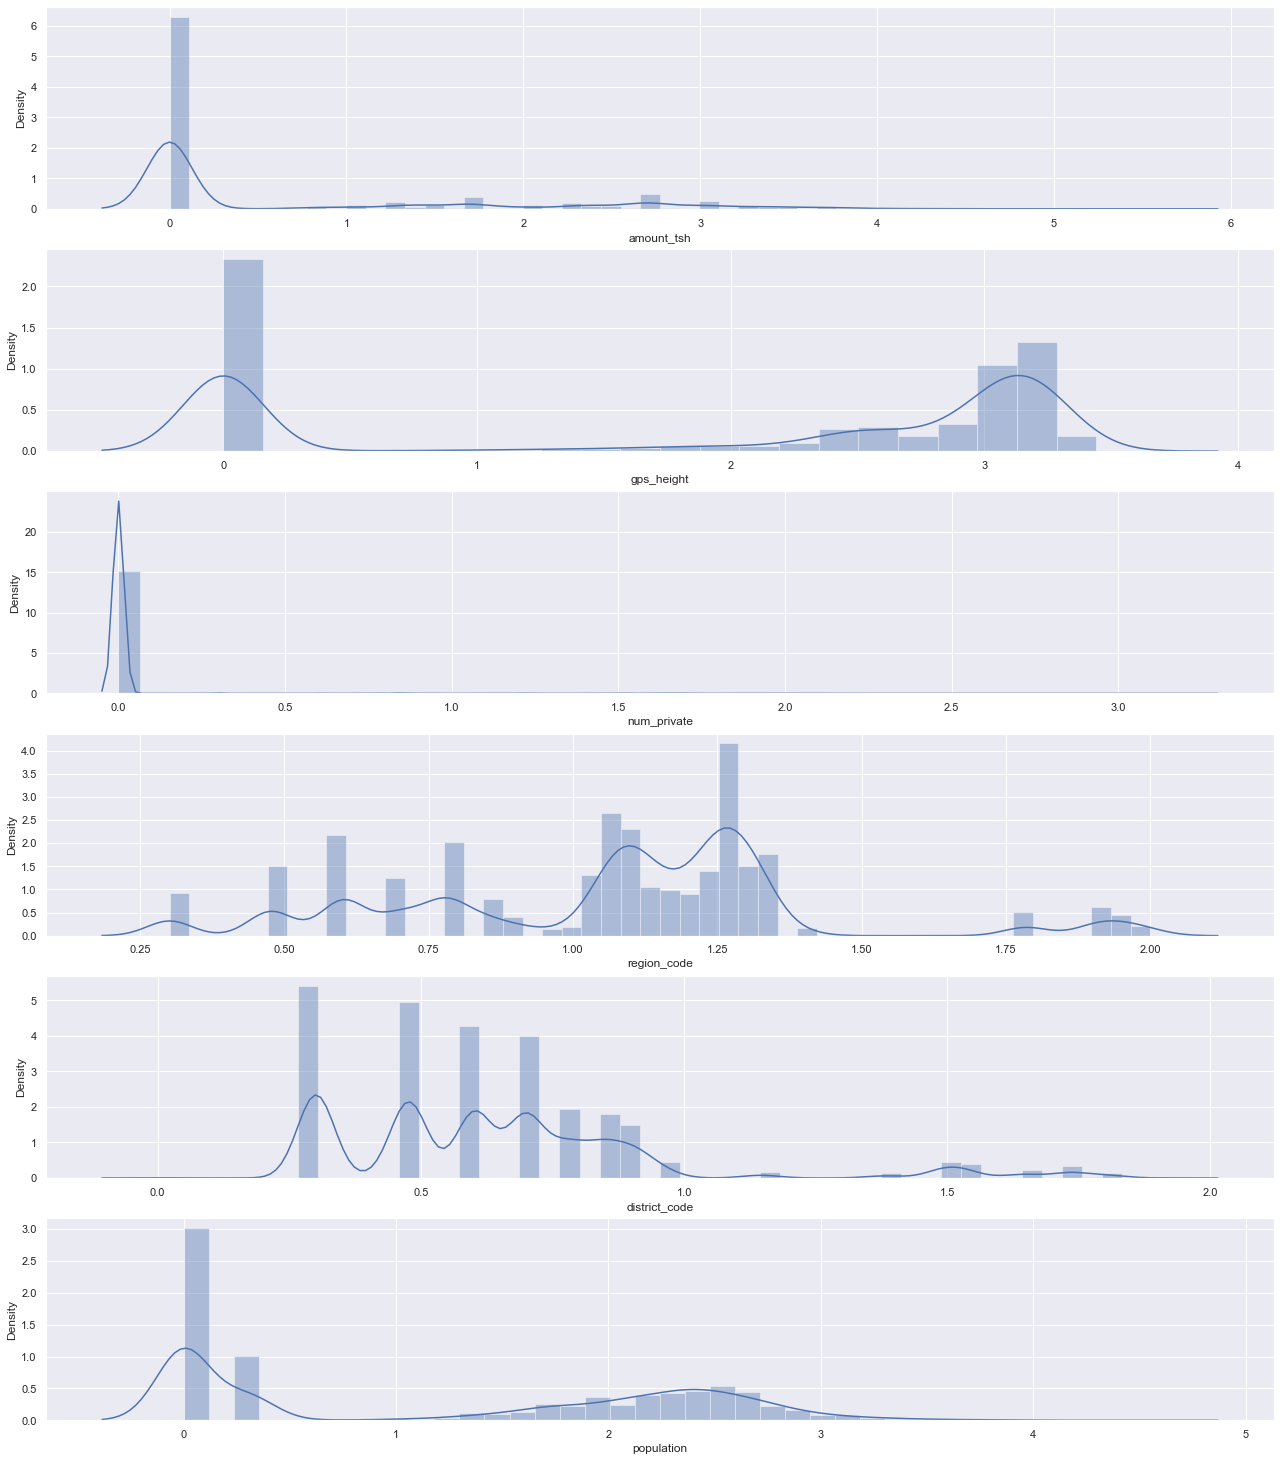

In [65]:
fig, axs = plt.subplots(nrows=6, figsize=(22, 26))
# Plot histograms
sns.distplot((df_new2["amount_tsh"].dropna()), ax=axs[0])
sns.distplot((df_new2["gps_height"].dropna()), ax=axs[1])
sns.distplot((df_new2["num_private"].dropna()), ax=axs[2])
sns.distplot((df_new2["region_code"].dropna()), ax=axs[3])
sns.distplot((df_new2["district_code"].dropna()), ax=axs[4])
sns.distplot((df_new2["population"].dropna()), ax=axs[5])
plt.show()

### Correlation understanding of the numerical features

This is important because it reveals the linear relationships between features. I want the numerical features as they correlate to target variable (`status_group`), as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. And parametric predictive model suggest that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption.

So now let's look at how all the numerical features within the model are correlated.

- First, I want to transform the target variable 

In [66]:
df_new2.status_group.value_counts()

functional                 32054
non_functional             22659
functional_needs_repair     4316
Name: status_group, dtype: int64

In [67]:
df_new2['status_group'] = df_new2['status_group'].map({'functional': 2, 
                                                       'functional_needs_repair': 1, 
                                                       'non_functional': 0})

In [68]:
df_new2.status_group.value_counts()

2    32054
0    22659
1     4316
Name: status_group, dtype: int64

In [69]:
cor_var = ['amount_tsh', 'gps_height','num_private','region_code',
           'district_code','population', 'status_group']

In [70]:
correlation = df_new2[cor_var].corr()

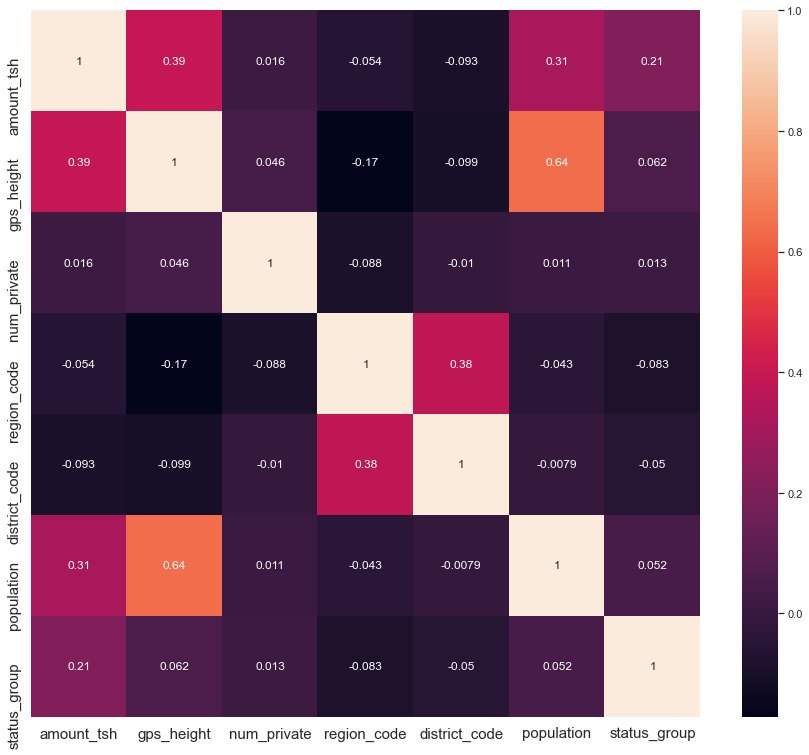

In [71]:
# Plot correlation
plt.figure(figsize=(15, 13))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

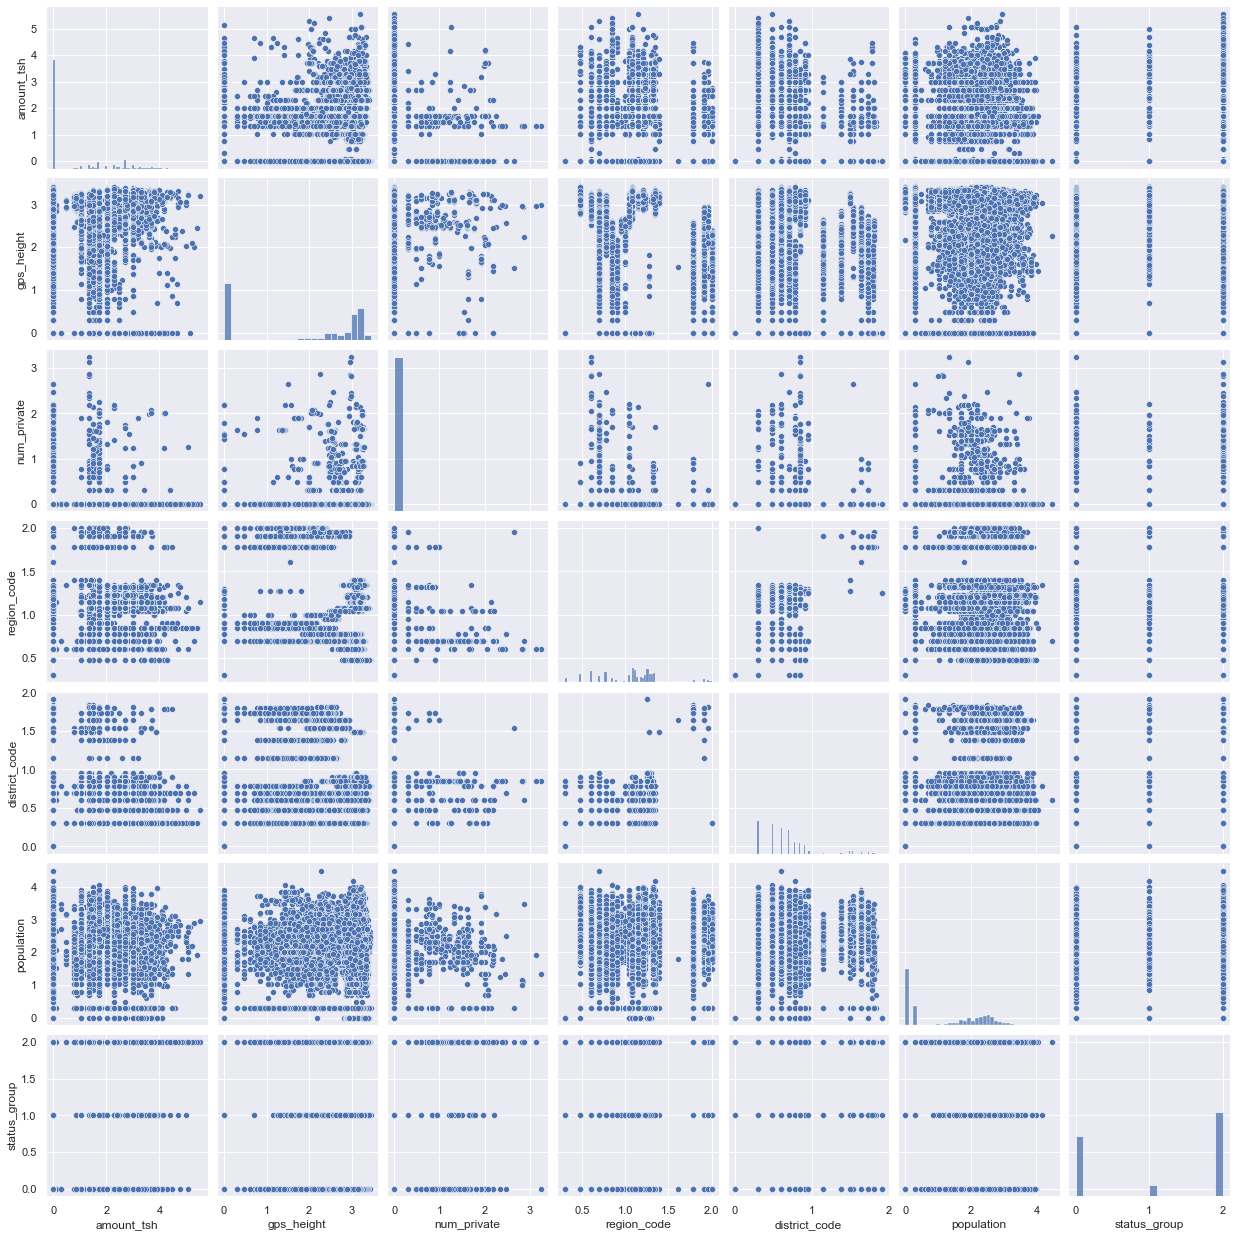

In [72]:
# Checking the pairplot of these features 

sns.pairplot(df_new2[cor_var])

### Insight 3

- Do some cleaning
- Segment that caterogies to two groups
- Find the data distribution of some categorical variables 
- Thier relationship to the target variables
- Confirm the outlier in each category 
- Find feature importance of each category class to the target varible class 

In [73]:
# Checking the value count of each variable using for loop

for cat in strings:
    print(cat)
    print(df_new2[cat].value_counts())
    print()

funder
government_of_tanzania    9014
missing                   3635
danida                    3114
hesawa                    2200
rwssp                     1374
                          ... 
kipo_potry                   1
umoja                        1
mwakifuna                    1
rudep/norad                  1
sido                         1
Name: funder, Length: 1895, dtype: int64

installer
dwe               17364
missing            3655
government         1891
hesawa             1395
rwe                1205
                  ...  
justine_marwa         1
arab_community        1
twig                  1
dwe_/tassaf           1
dew                   1
Name: installer, Length: 1926, dtype: int64

wpt_name
none                             3561
shuleni                          1714
zahanati                          811
msikitini                         533
kanisani                          313
                                 ... 
mashaja_venasi                      1
shule_ya_msingi_

#### Do some cleaning

**To do**

- Remove samples where `water_quality` is **`fluoride_abandoned`**
- Remove samples where `waterpoint_type_group` is **`dam`**
- Drop `region` as `longitude and latitude` would represent it's information
- Drop `ward` as `lga` would represent it's information
- Drop `payment_type` feature, because it seems to have same information as `payment` feature
- Drop `quantity`feature, because it seems to have same information as `quantity_group` feature
- Drop `source` feature, because it seems to have same information as `source_type` feature
- Drop `waterpoint_type` feature, because it seems to have same information as `waterpoint_type_group` feature
- Drop `extraction_type` and `extraction_type_group` features, they seem to pass the same information as `extraction_type_class`
- Drop `management` feature, because it seems to have same information as `management_group` feature

In [74]:
# removing samples
df_new3 = df_new2.copy()
df_new3 = df_new3[df_new3.water_quality != 'fluoride_abandoned'].reset_index(drop=True)
df_new3 = df_new3[df_new3.waterpoint_type_group != 'dam'].reset_index(drop=True)

In [75]:
# checking 

df_new3[df_new3.water_quality == 'fluoride_abandoned']

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


In [76]:
# drop the above outlined features

drop_features = ['region', 'ward', 'payment_type', 'quantity', 'source', 'waterpoint_type', 
                 'extraction_type', 'extraction_type_group', 'management']

df_new3.drop(columns=drop_features, inplace=True)

In [77]:
# checking
df_new3.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment,water_quality,quality_group,quantity_group,source_type,source_class,waterpoint_type_group,status_group
0,69572,3.778224,2011-03-14,roman,3.143327,roman,34.938093,-9.856322,none,0.0,lake_nyasa,mnyusi_b,1.079181,0.778151,ludewa,2.041393,true,geodata_consultants_ltd,vwc,Roman,false,1999,gravity,user-group,pay_annually,soft,good,enough,spring,groundwater,communal_standpipe,2
1,8776,0.000000,2013-03-06,grumeti,3.146128,grumeti,34.698766,-2.147466,zahanati,0.0,lake_victoria,nyamara,1.322219,0.477121,serengeti,2.448706,true,geodata_consultants_ltd,other,NaN,true,2010,gravity,user-group,never_pay,soft,good,insufficient,rainwater_harvesting,surface,communal_standpipe,2


#### Segment that caterogies to two groups

In [78]:
group_1 = ['id','funder','installer','wpt_name','subvillage',
           'lga', 'scheme_management', 'scheme_name', 'status_group']

group_2 = ['id','basin', 'public_meeting', 'recorded_by', 'permit', 'management_group', 'payment',
           'water_quality', 'quality_group', 'quantity_group', 'source_type', 'source_class',
           'waterpoint_type_group', 'status_group']

#### Find the data distribution of the chosen categorical variables

**Group 1**

In [79]:
# get the dataframe 
dfgroup_1 = df_new3[group_1]

I will investigate the top 10 class of each feature

In [80]:
# get the list of the top 10 class 
funder_top10 = list(dfgroup_1.funder.value_counts().head(10).index)
installer_top10 = list(dfgroup_1.installer.value_counts().head(9).index)
wpt_top10 = list(dfgroup_1.wpt_name.value_counts().head(10).index)
subvillage_top10 = list(dfgroup_1.subvillage.value_counts().head(10).index)
lga_top10 = list(dfgroup_1.lga.value_counts().head(10).index)
scheme_mgt_top10 = list(dfgroup_1.scheme_management.value_counts().head(10).index)

In [81]:
# Dataframe for features 
funder_top10_df = dfgroup_1.query('funder == ["government_of_tanzania","missing", "danida", "hesawa", "rwssp", "kkkt", "world_bank", "world_vision", "unicef", "tasaf"]')
installer_top10_df = dfgroup_1.query('installer == ["dwe", "missing", "government", "hesawa", "rwe", "danida", "district_council", "kkkt", "commu"]')
wpt_top10_df = dfgroup_1.query('wpt_name == ["none", "shuleni", "zahanati", "msikitini", "kanisani", "bombani", "sokoni", "ofisini", "school", "shule_ya_msingi"]')
subvillage_top10_df = dfgroup_1.query('subvillage == ["madukani", "shuleni", "majengo", "kati", "mtakuja", "sokoni", "m", "muungano", "mbuyuni", "mlimani"]')
lga_top10_df = dfgroup_1.query('lga == ["njombe", "arusha_rural", "moshi_rural", "bariadi", "rungwe", "kilosa", "kasulu", "mbozi", "meru", "bagamoyo"]')
scheme_mgt_top10_df = dfgroup_1.query('scheme_management == ["vwc", "wug", "missing", "water_authority", "wua", "water_board", "parastatal", "private_operator", "company", "other"]')

# Reseting the indexes
funder_top10_df = funder_top10_df.reset_index(drop=True)
installer_top10_df = installer_top10_df.reset_index(drop=True)
wpt_top10_df = wpt_top10_df.reset_index(drop=True)
subvillage_top10_df = subvillage_top10_df.reset_index(drop=True)
lga_top10_df = lga_top10_df.reset_index(drop=True)
scheme_mgt_top10_df = scheme_mgt_top10_df.reset_index(drop=True)

funder_top10_df.head()

,id,funder,installer,wpt_name,subvillage,lga,scheme_management,scheme_name,status_group
0,67743,unicef,unicef,zahanati_ya_nanyumbu,mahakamani,nanyumbu,vwc,NaN,0
1,54551,rwssp,dwe,tushirikiane,nyawishi_center,kahama,missing,NaN,0
2,50409,danida,danida,kwa_alid_nchimbi,ngondombwito,namtumbo,wug,NaN,2
3,36957,world_vision,world_vision,pamba,nkilifa,maswa,wug,NaN,2
4,48451,unicef,dwe,kwa_john_mtenzi,kidudumo,njombe,wua,wanging'ombe water supply s,0


Insight to get from all these features:
- Class contribution to the determination of the label class 

In [82]:
# Finding the percentage of each class in relationship to the target variable

# funder
funder_class = funder_top10_df.groupby([funder_top10_df['funder'], funder_top10_df['status_group']])['id'].count().unstack(level=1).fillna(0)
funder_class_status = (funder_class.div(funder_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# installer
installer_class = installer_top10_df.groupby([installer_top10_df['installer'], installer_top10_df['status_group']])['id'].count().unstack(level=1).fillna(0)
installer_class_status = (installer_class.div(installer_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# wpt_name
wpt_name_class = wpt_top10_df.groupby([wpt_top10_df['wpt_name'], wpt_top10_df['status_group']])['id'].count().unstack(level=1).fillna(0)
wpt_name_class_status = (wpt_name_class.div(wpt_name_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# subvillage
subvillage_class = subvillage_top10_df.groupby([subvillage_top10_df['subvillage'], subvillage_top10_df['status_group']])['id'].count().unstack(level=1).fillna(0)
subvillage_class_status = (subvillage_class.div(subvillage_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# lga
lga_class = lga_top10_df.groupby([lga_top10_df['lga'], lga_top10_df['status_group']])['id'].count().unstack(level=1).fillna(0)
lga_class_status = (lga_class.div(lga_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# scheme_management
scheme_mgt_class = scheme_mgt_top10_df.groupby([scheme_mgt_top10_df['scheme_management'], scheme_mgt_top10_df['status_group']])['id'].count().unstack(level=1).fillna(0)
scheme_mgt_class_status = (scheme_mgt_class.div(scheme_mgt_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)



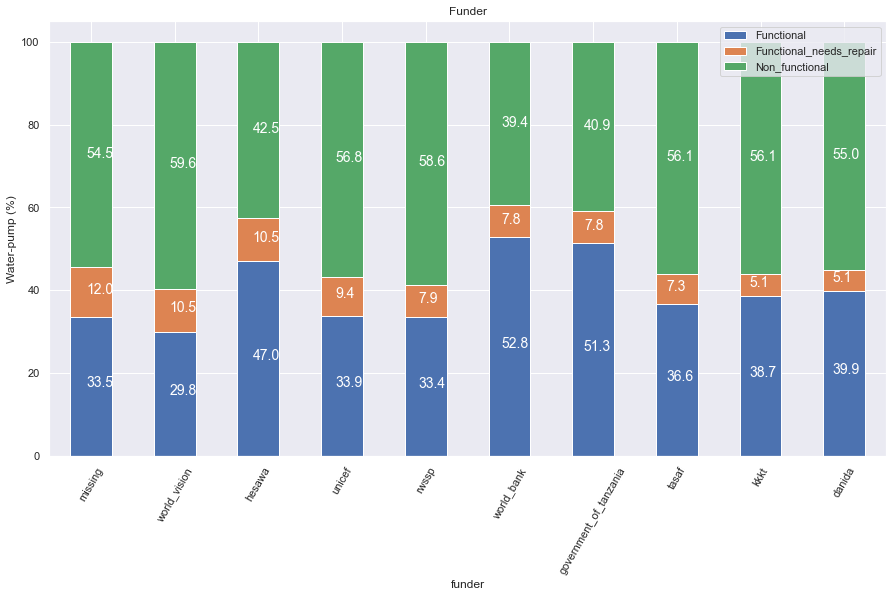

In [83]:
# Making stack bar charts for each class

plot_stacked_bars(funder_class_status, 'Funder', rot_=60)

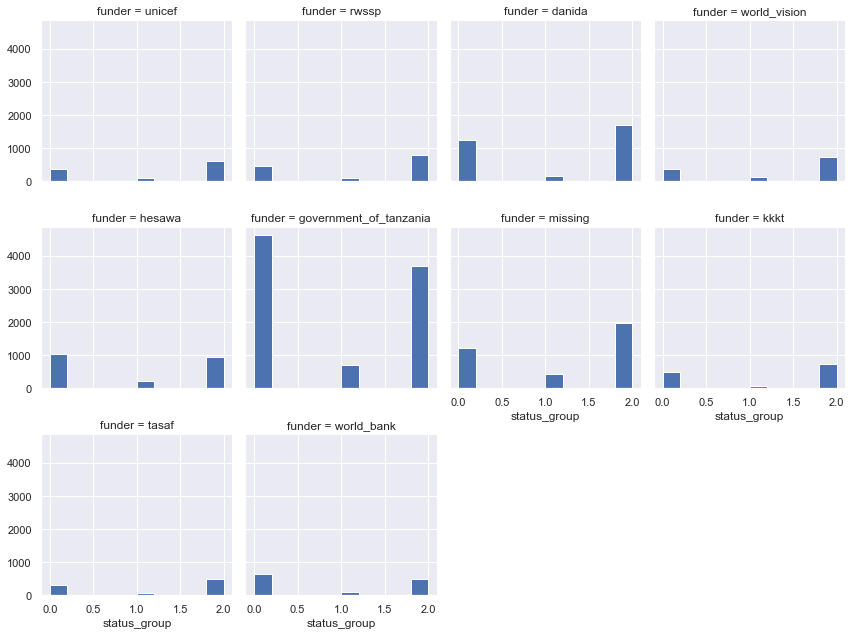

In [84]:
# Plot the Seaborn's FacetGrid

g = sns.FacetGrid(data = funder_top10_df, col = 'funder', col_wrap=4)
g.map(plt.hist, "status_group")

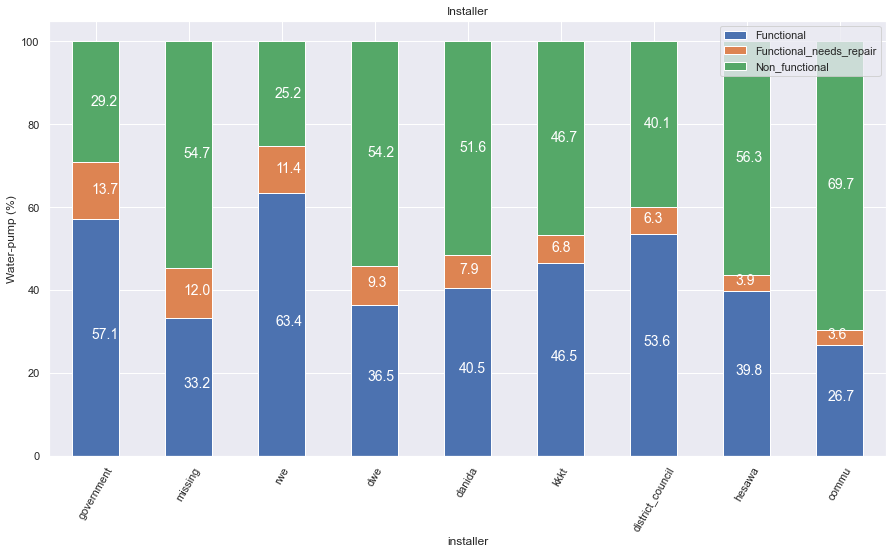

In [85]:
# Making stack bar charts for each class

plot_stacked_bars(installer_class_status, 'Installer', rot_=60)

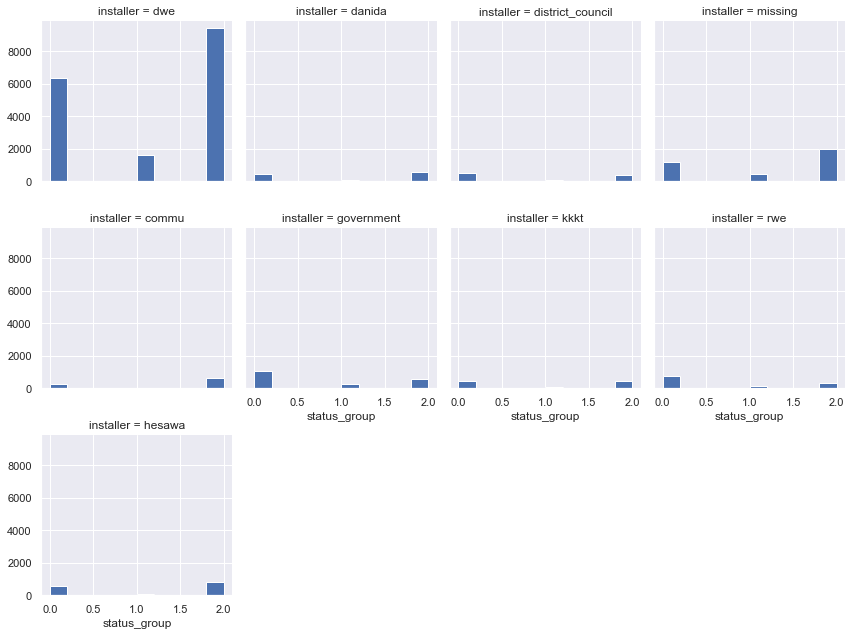

In [86]:
g = sns.FacetGrid(data = installer_top10_df, col = 'installer', col_wrap=4)
g.map(plt.hist, "status_group")

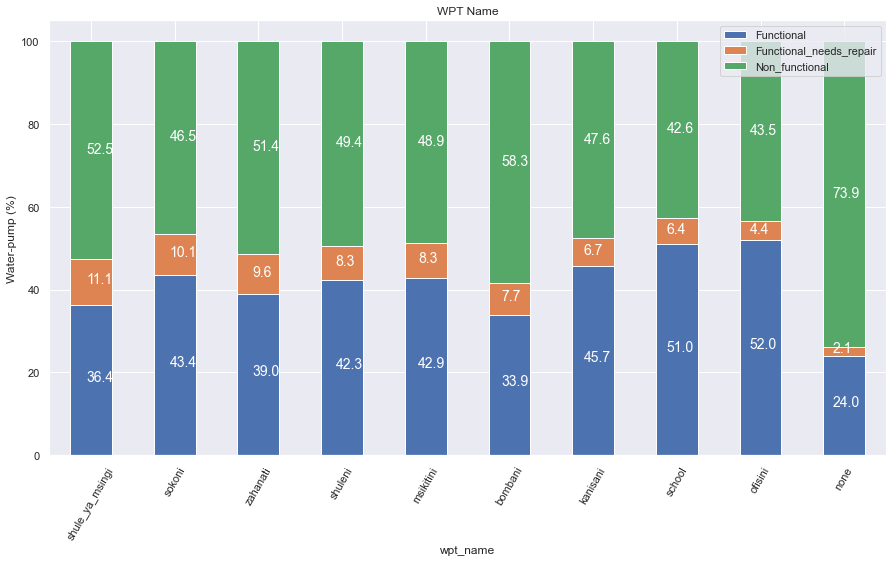

In [87]:
# Making stack bar charts for each class

plot_stacked_bars(wpt_name_class_status, 'WPT Name', rot_=60)

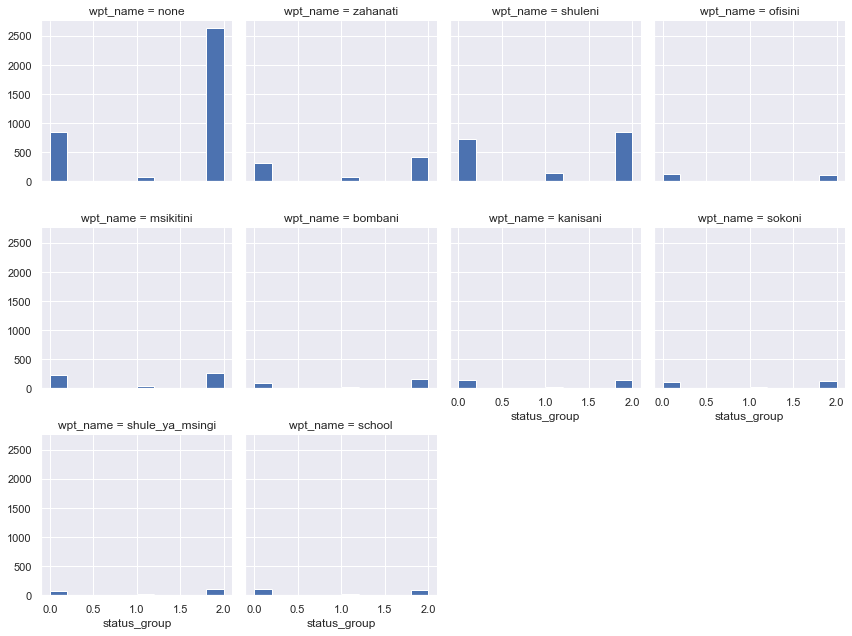

In [88]:
g = sns.FacetGrid(data = wpt_top10_df, col = 'wpt_name', col_wrap=4)
g.map(plt.hist, "status_group")

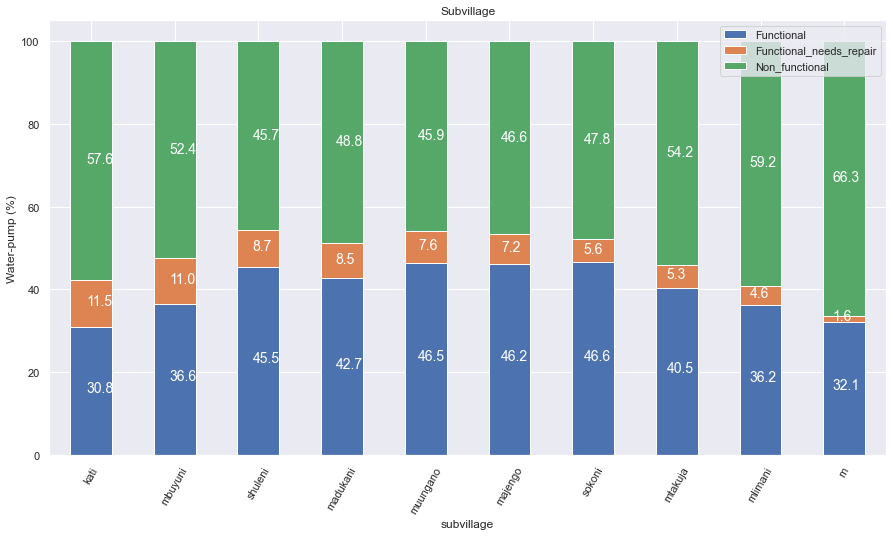

In [89]:
# Making stack bar charts for each class

plot_stacked_bars(subvillage_class_status, 'Subvillage', rot_=60)

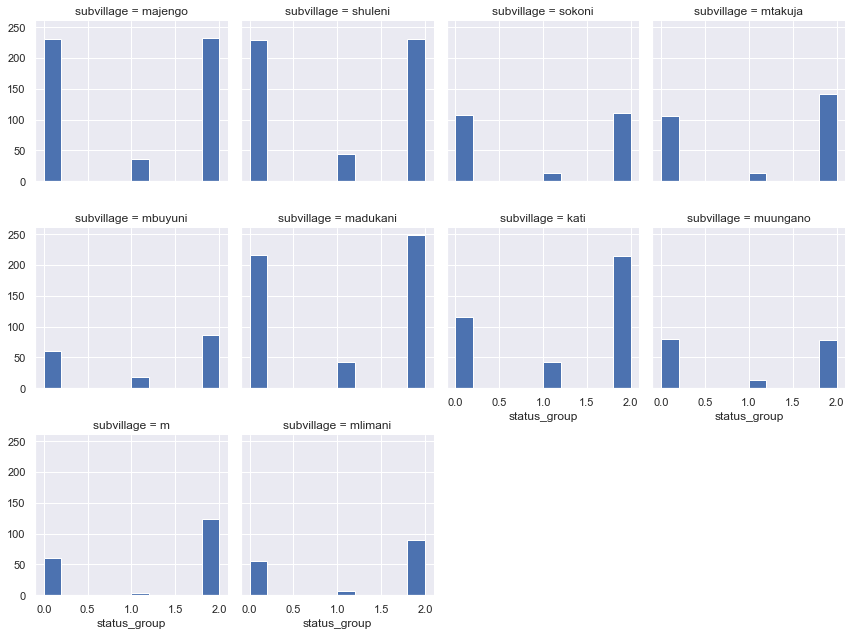

In [90]:
g = sns.FacetGrid(data = subvillage_top10_df, col = 'subvillage', col_wrap=4)
g.map(plt.hist, "status_group")

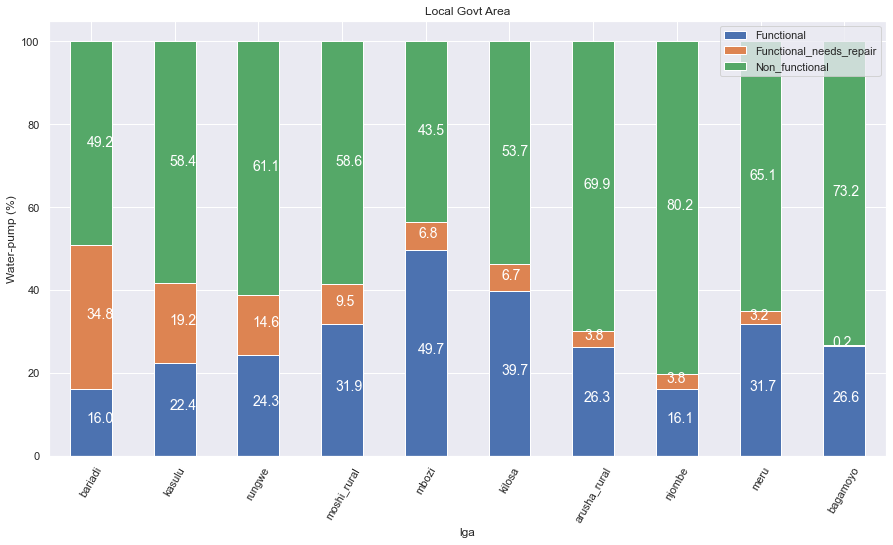

In [91]:
# Making stack bar charts for each class

plot_stacked_bars(lga_class_status, 'Local Govt Area', rot_=60)

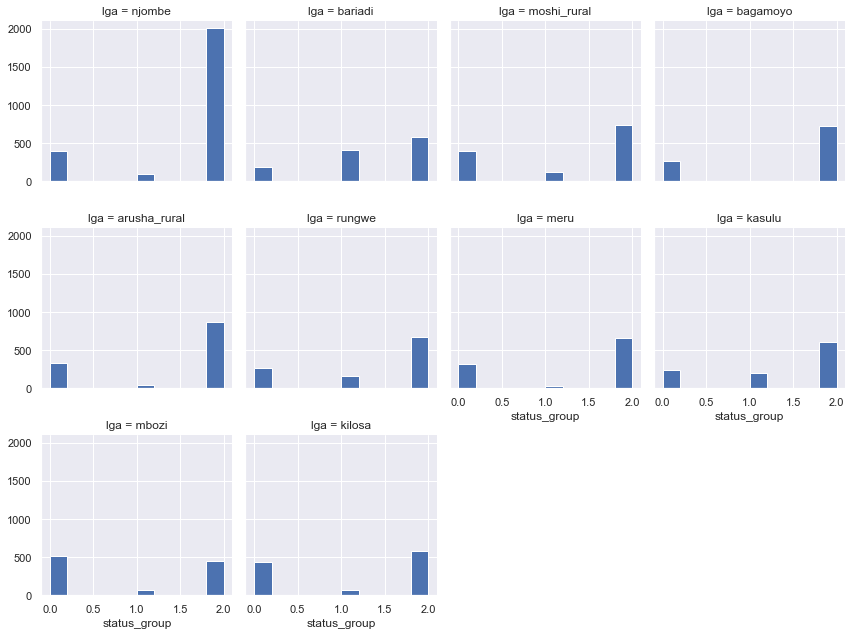

In [92]:
g = sns.FacetGrid(data = lga_top10_df, col = 'lga', col_wrap=4)
g.map(plt.hist, "status_group")

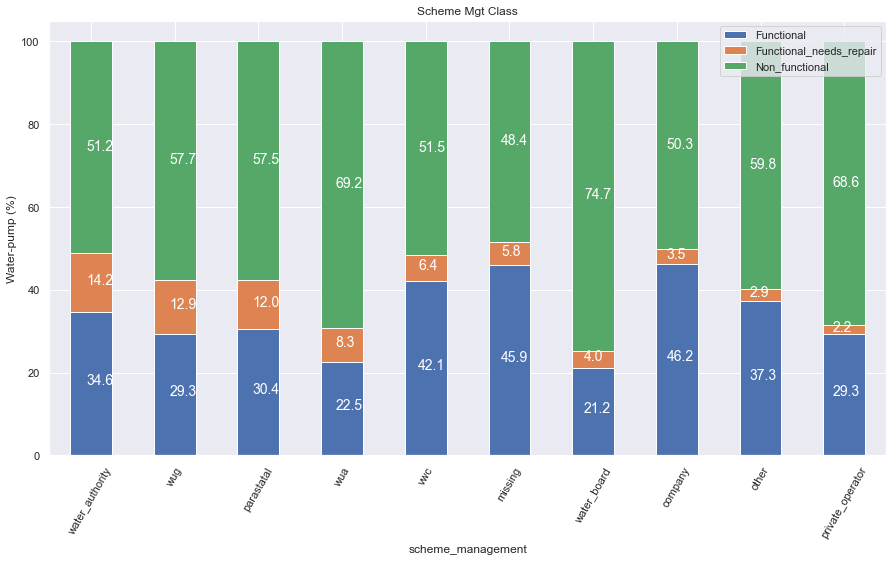

In [93]:
# Making stack bar charts for each class

plot_stacked_bars(scheme_mgt_class_status, 'Scheme Mgt Class', rot_=60)

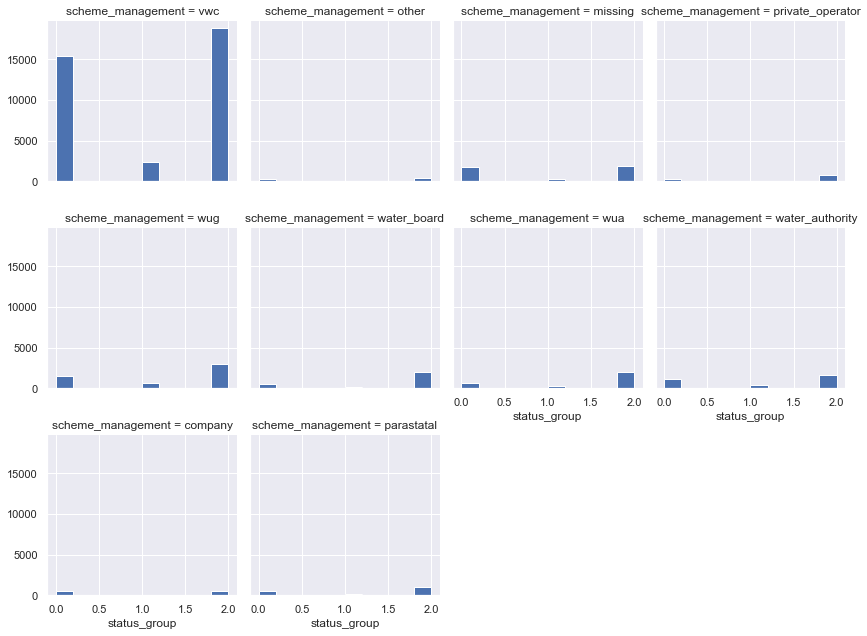

In [94]:
g = sns.FacetGrid(data = scheme_mgt_top10_df, col = 'scheme_management', col_wrap=4)
g.map(plt.hist, "status_group")

**Group 2**

In [95]:
# get the dataframe 
dfgroup_2 = df_new3[group_2]

Insight to get from all these features:
- Class contribution to the determination of the label class 

In [96]:
group_2

['id',
 'basin',
 'public_meeting',
 'recorded_by',
 'permit',
 'management_group',
 'payment',
 'water_quality',
 'quality_group',
 'quantity_group',
 'source_type',
 'source_class',
 'waterpoint_type_group',
 'status_group']

In [97]:
# Finding the percentage of each class in relationship to the target variable

# basin
basin_class = dfgroup_2.groupby([dfgroup_2['basin'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
basin_class_status = (basin_class.div(basin_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# public_meeting
public_meeting_class = dfgroup_2.groupby([dfgroup_2['public_meeting'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
public_meeting_class_status = (public_meeting_class.div(public_meeting_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# permit
permit_class = dfgroup_2.groupby([dfgroup_2['permit'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
permit_class_status = (permit_class.div(permit_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# management_group
management_group_class = dfgroup_2.groupby([dfgroup_2['management_group'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
management_group_class_status = (management_group_class.div(management_group_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# payment
payment_class = dfgroup_2.groupby([dfgroup_2['payment'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
payment_class_status = (payment_class.div(payment_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# water_quality
water_quality_class = dfgroup_2.groupby([dfgroup_2['water_quality'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
water_quality_class_status = (water_quality_class.div(water_quality_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# quality_group
quality_group_class = dfgroup_2.groupby([dfgroup_2['quality_group'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
quality_group_class_status = (quality_group_class.div(quality_group_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# quantity_group
quantity_group_class = dfgroup_2.groupby([dfgroup_2['quantity_group'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
quantity_group_class_status = (quantity_group_class.div(quantity_group_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# source_type
source_type_class = dfgroup_2.groupby([dfgroup_2['source_type'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
source_type_class_status = (source_type_class.div(source_type_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# source_class
source_class_class = dfgroup_2.groupby([dfgroup_2['source_class'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
source_class_class_status = (source_class_class.div(source_class_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# waterpoint_type_group
waterpoint_type_group_class = dfgroup_2.groupby([dfgroup_2['waterpoint_type_group'], dfgroup_2['status_group']])['id'].count().unstack(level=1).fillna(0)
waterpoint_type_group_class_status = (waterpoint_type_group_class.div(waterpoint_type_group_class.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)



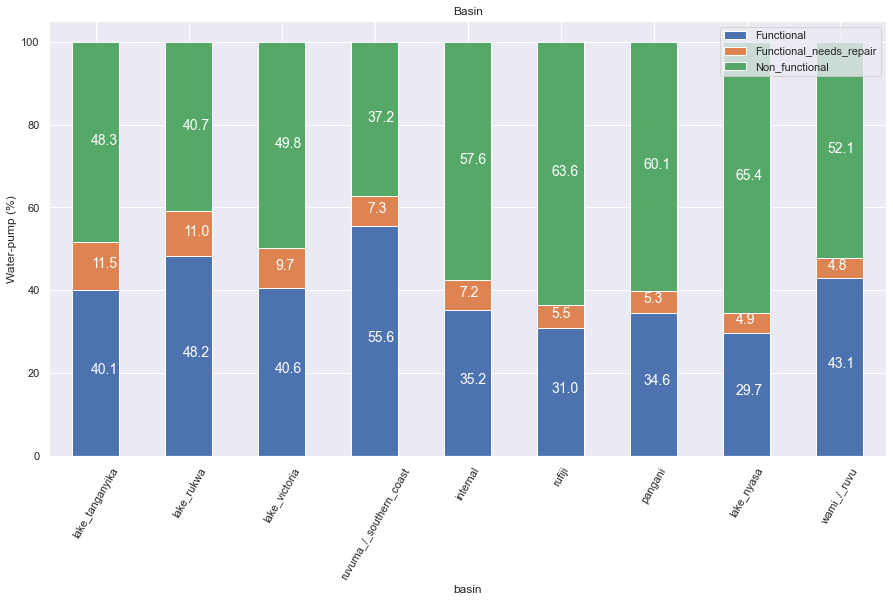

In [98]:
# Making stack bar charts for each class

plot_stacked_bars(basin_class_status, 'Basin', rot_=60)

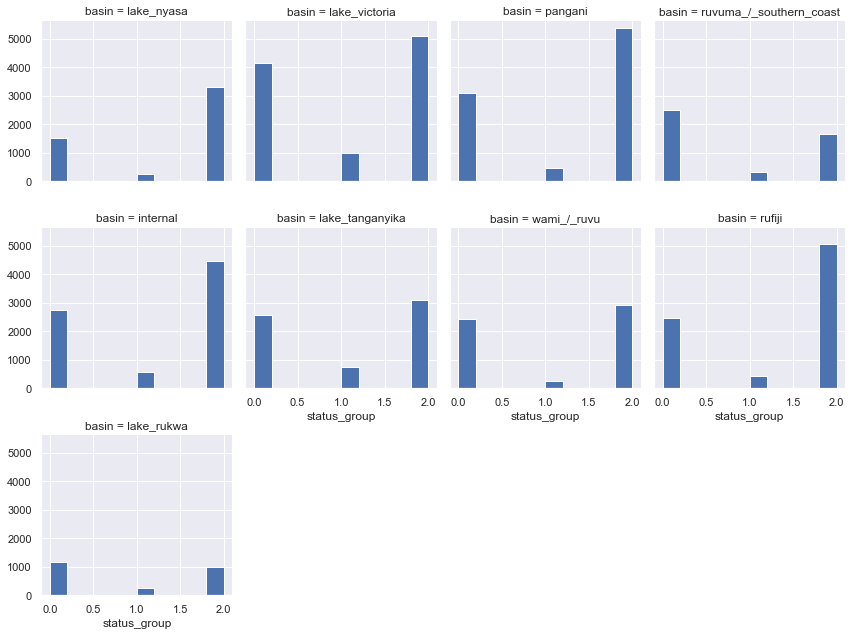

In [99]:
# Plot the Seaborn's FacetGrid

g = sns.FacetGrid(data = dfgroup_2, col = 'basin', col_wrap=4)
g.map(plt.hist, "status_group")

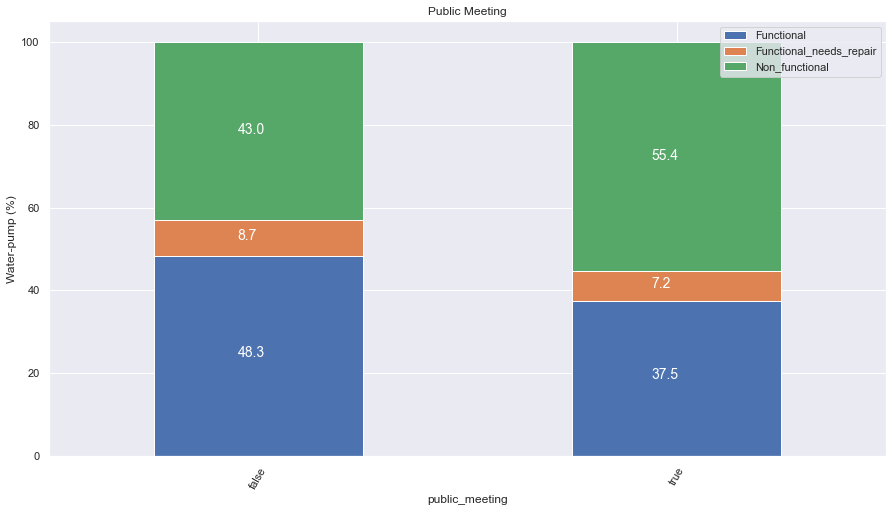

In [100]:
# Making stack bar charts for each class

plot_stacked_bars(public_meeting_class_status, 'Public Meeting', rot_=60)

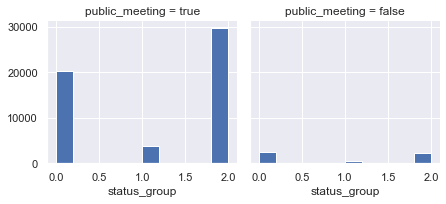

In [101]:
g = sns.FacetGrid(data = dfgroup_2, col = 'public_meeting', col_wrap=4)
g.map(plt.hist, "status_group")

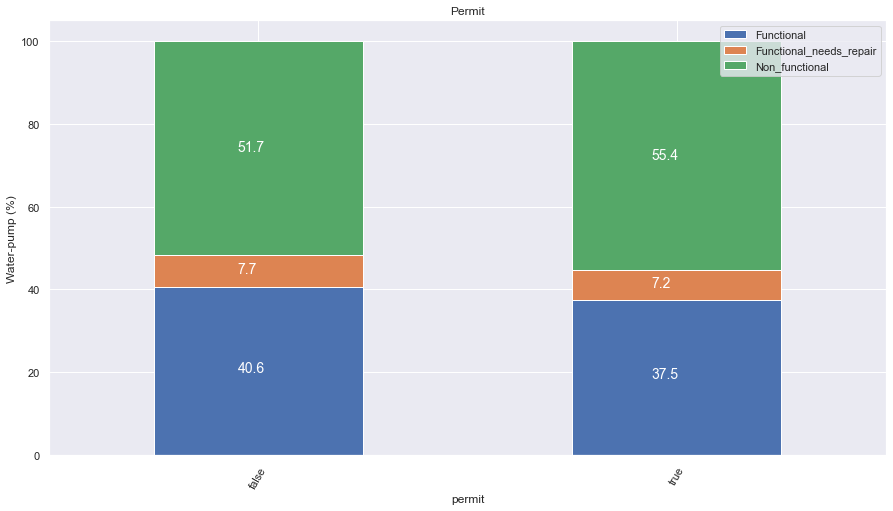

In [102]:
# Making stack bar charts for each class

plot_stacked_bars(permit_class_status, 'Permit', rot_=60)

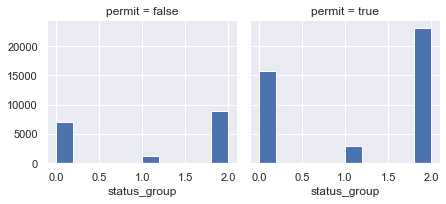

In [103]:
g = sns.FacetGrid(data = dfgroup_2, col = 'permit', col_wrap=4)
g.map(plt.hist, "status_group")

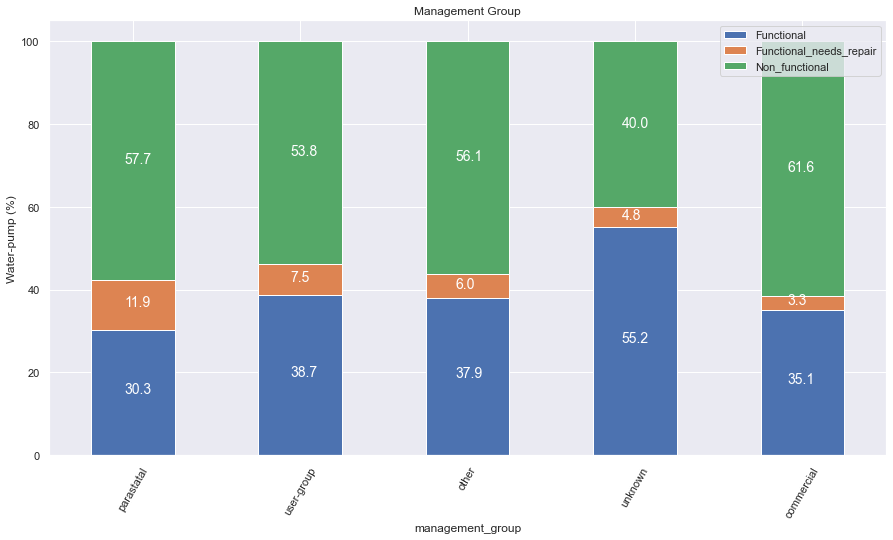

In [104]:
# Making stack bar charts for each class

plot_stacked_bars(management_group_class_status, 'Management Group', rot_=60)

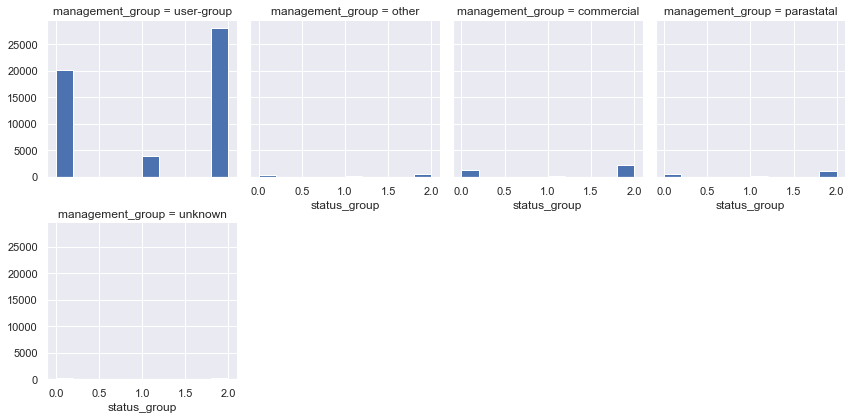

In [105]:
g = sns.FacetGrid(data = dfgroup_2, col = 'management_group', col_wrap=4)
g.map(plt.hist, "status_group")

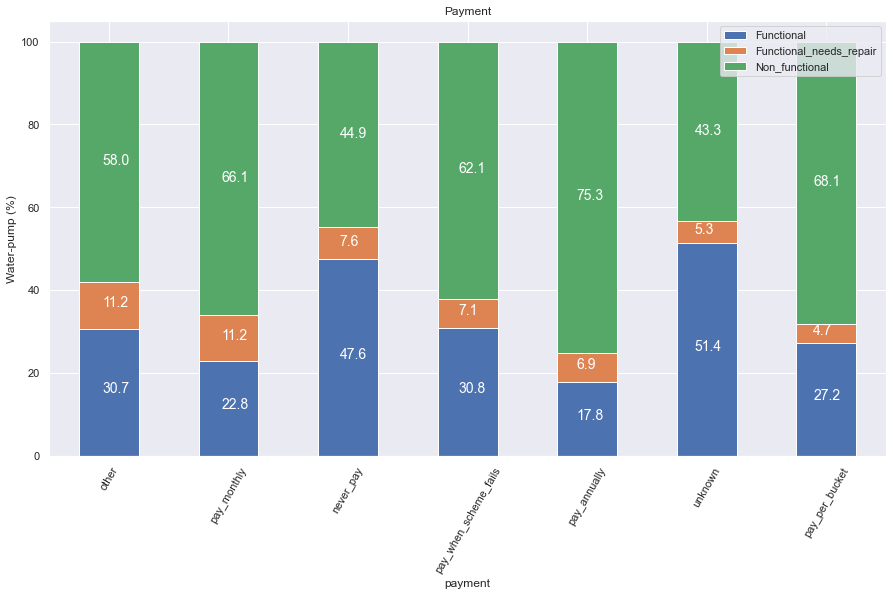

In [106]:
# Making stack bar charts for each class

plot_stacked_bars(payment_class_status, 'Payment', rot_=60)

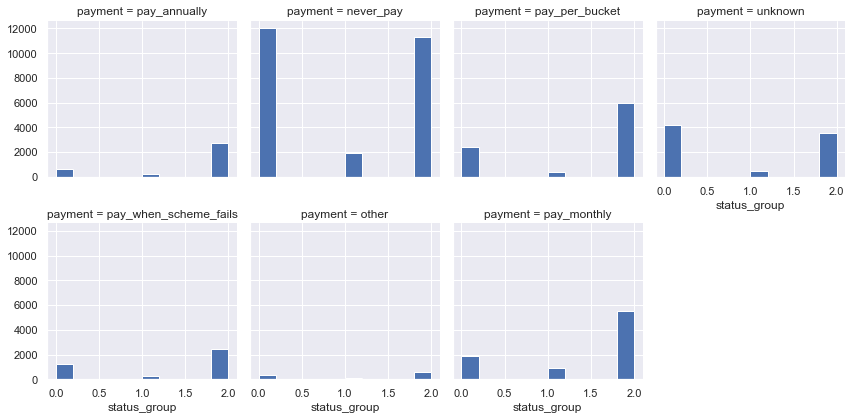

In [107]:
g = sns.FacetGrid(data = dfgroup_2, col = 'payment', col_wrap=4)
g.map(plt.hist, "status_group")

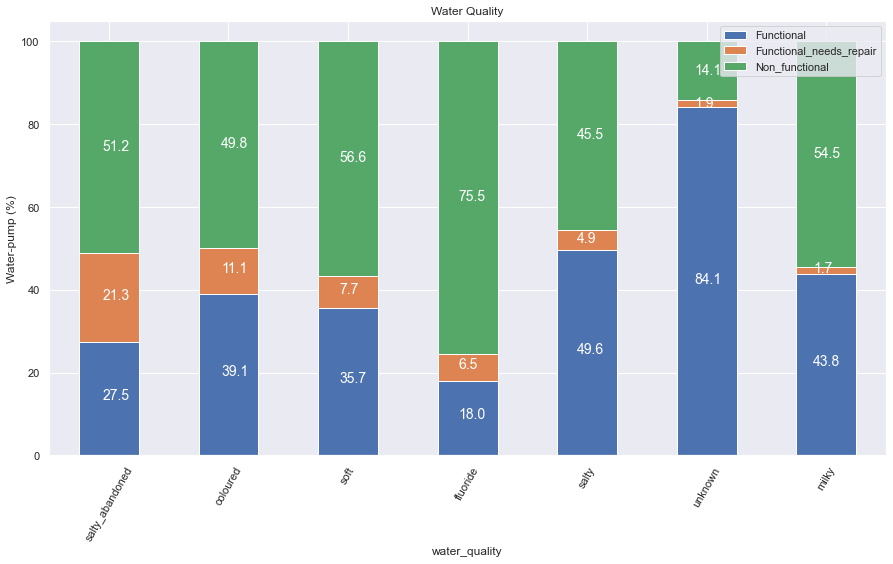

In [108]:
# Making stack bar charts for each class

plot_stacked_bars(water_quality_class_status, 'Water Quality', rot_=60)

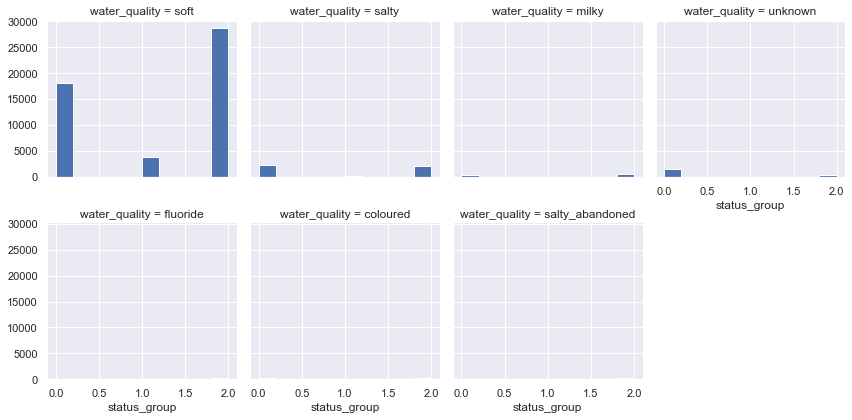

In [109]:
g = sns.FacetGrid(data = dfgroup_2, col = 'water_quality', col_wrap=4)
g.map(plt.hist, "status_group")

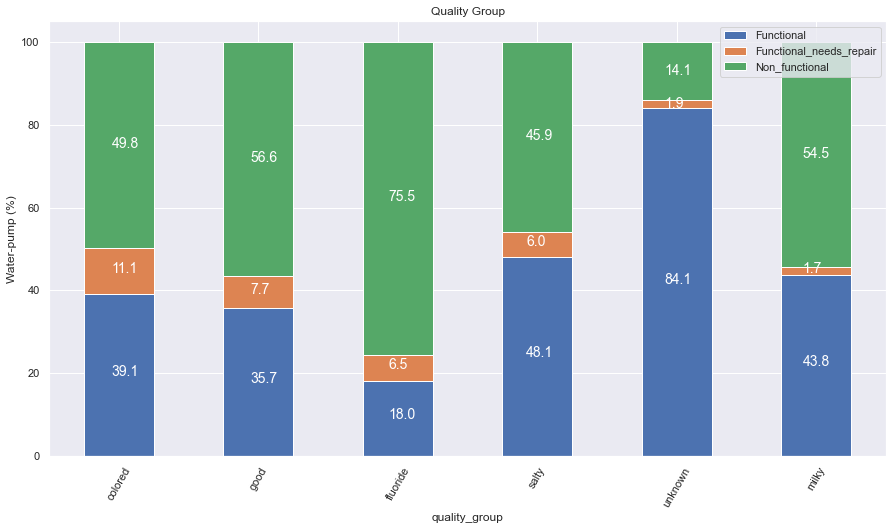

In [110]:
# Making stack bar charts for each class

plot_stacked_bars(quality_group_class_status, 'Quality Group', rot_=60)

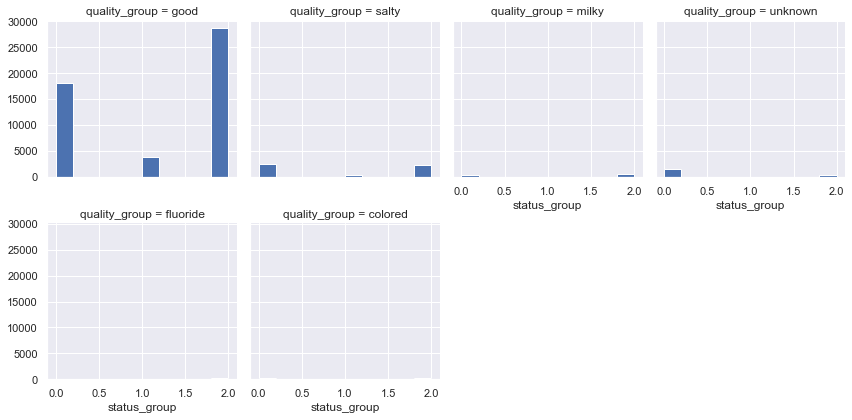

In [111]:
g = sns.FacetGrid(data = dfgroup_2, col = 'quality_group', col_wrap=4)
g.map(plt.hist, "status_group")

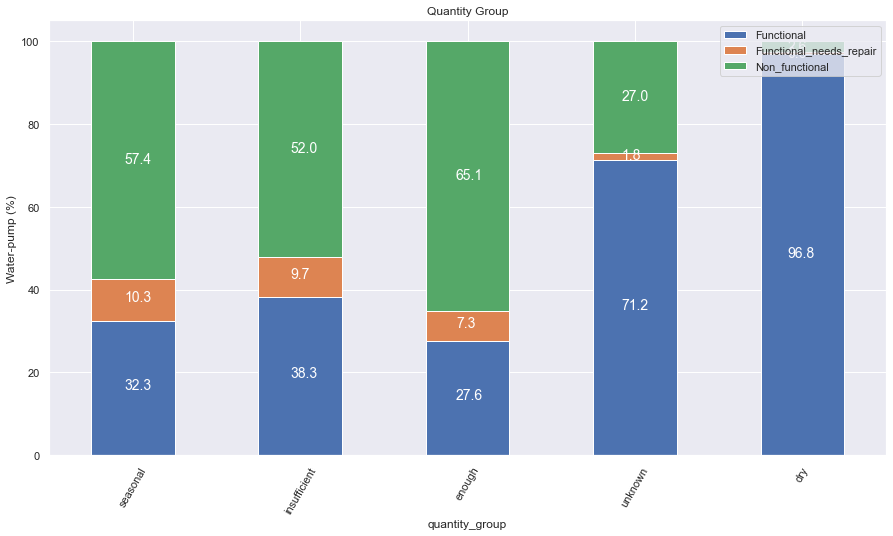

In [112]:
# Making stack bar charts for each class

plot_stacked_bars(quantity_group_class_status, 'Quantity Group', rot_=60)

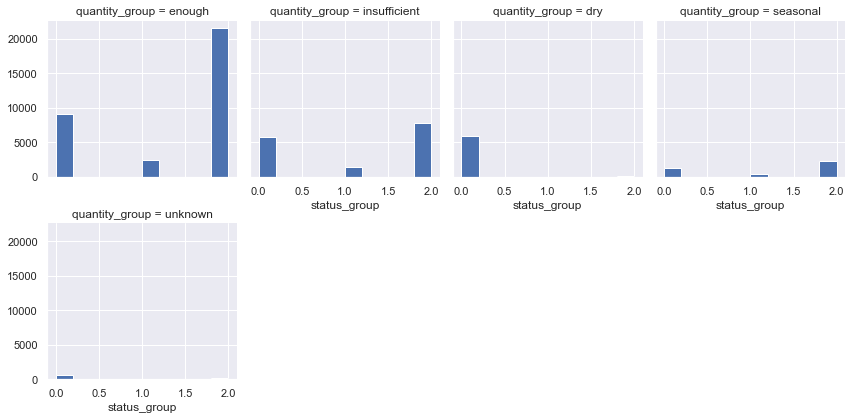

In [113]:
g = sns.FacetGrid(data = dfgroup_2, col = 'quantity_group', col_wrap=4)
g.map(plt.hist, "status_group")

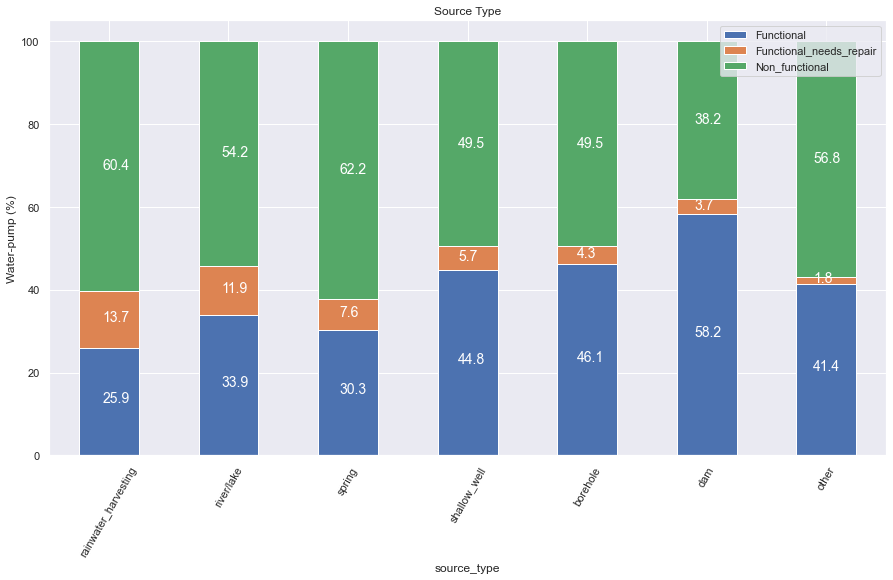

In [114]:
# Making stack bar charts for each class

plot_stacked_bars(source_type_class_status, 'Source Type', rot_=60)

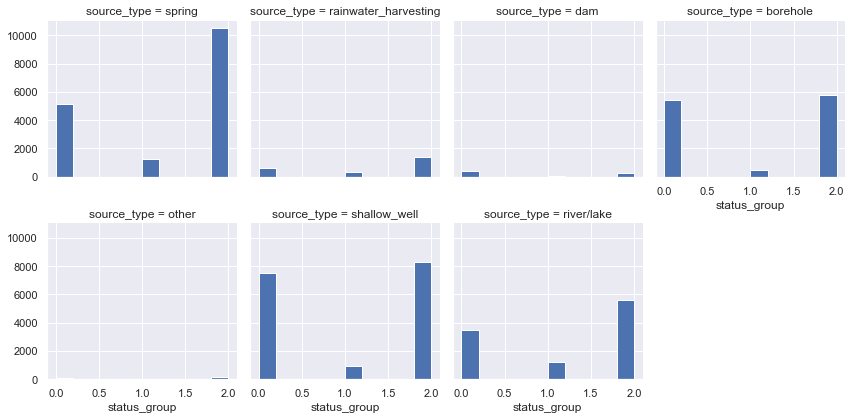

In [115]:
g = sns.FacetGrid(data = dfgroup_2, col = 'source_type', col_wrap=4)
g.map(plt.hist, "status_group")

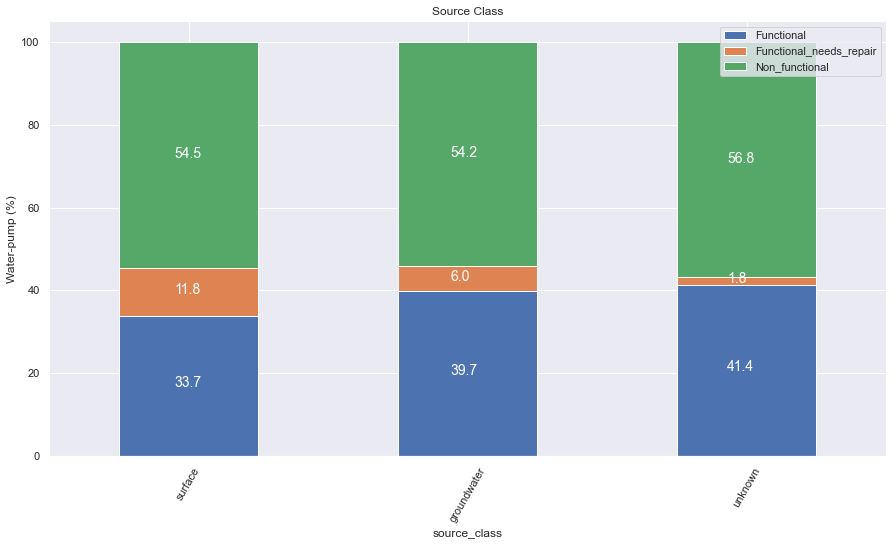

In [116]:
# Making stack bar charts for each class

plot_stacked_bars(source_class_class_status, 'Source Class', rot_=60)

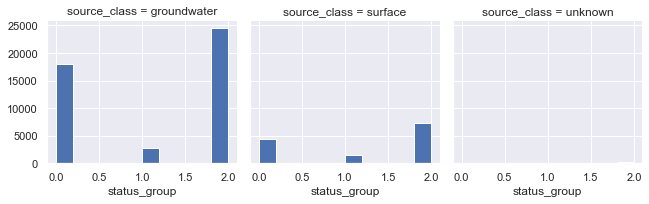

In [117]:
g = sns.FacetGrid(data = dfgroup_2, col = 'source_class', col_wrap=4)
g.map(plt.hist, "status_group")

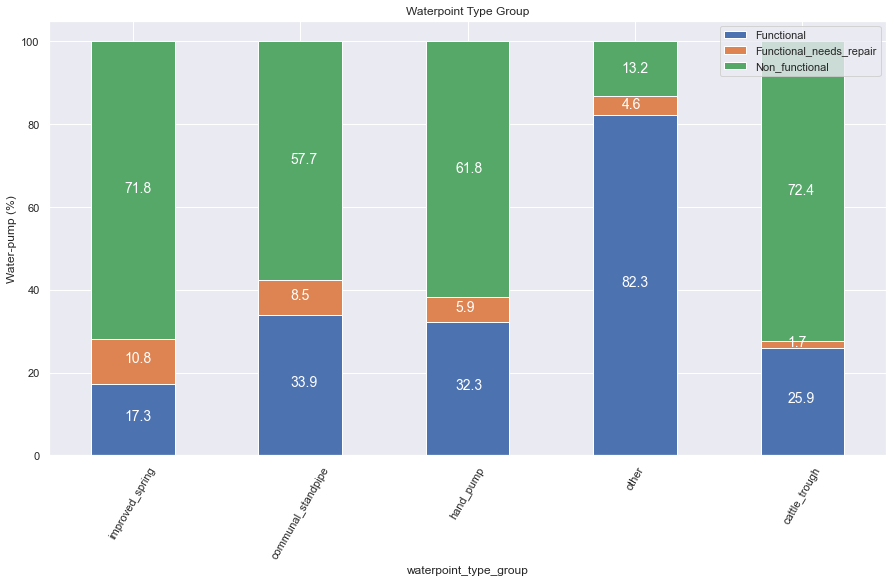

In [118]:
# Making stack bar charts for each class

plot_stacked_bars(waterpoint_type_group_class_status, 'Waterpoint Type Group', rot_=60)

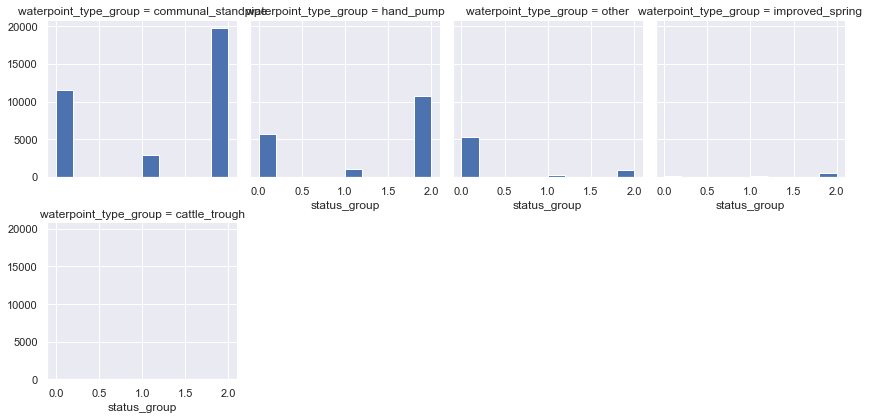

In [119]:
g = sns.FacetGrid(data = dfgroup_2, col = 'waterpoint_type_group', col_wrap=4)
g.map(plt.hist, "status_group")

After checking the distribution of all the categorical variables as against the target variable, some information that would help the model building going forward has been gained. Now, while transforming these features before supplying them to the model, some of the transformed features/classes will be dropped because information gain to the model is less relevant. 

The classes to focus will be:
- waterpoint_type_group (cattle_trough)
- waterpoint_type_group (improved_spring)
- source_class (unknown)
- source_type (other)
- quantity_group (unknown)
- quality_group (milky)
- quality_group (unknown)
- quality_group (fluoride)
- quality_group (colored)
- water_quality (milky)
- water_quality (fluoride)
- water_quality (coloured)
- water_quality (salty_abandoned)
- management_group (other)
- management_group (unknown)
- scheme_management (other)

## Simple Feature Engineering 

### Transforming caterigocal features 

To do: 
- Splitting the data to train, validation and test
- Transforming the categorical variables 
- Dropping the transformed above outlined classes

`Splitting the dataset to train, validation, and test sets`

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
df_new4 = df_new3.copy()

I want to make id and status_group dataframe out of df_new4 dataframe

In [122]:
df_status_id = df_new4[['id', 'status_group']]

In [123]:
df_full_train, df_test = train_test_split(df_new4, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)


In [124]:
# reset and drop the index 

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [125]:
y_train = df_train.status_group.values
y_val = df_val.status_group.values
y_test = df_test.status_group.values

In [126]:
# delete the target variable from the dataset 

del df_train['status_group']
del df_val['status_group']
del df_test['status_group']


`Transforming the categorical variables`

I will be transforming these features manually 

In [127]:
categorical_var1 = ['funder','installer','wpt_name','subvillage','lga','scheme_management']

In [128]:
# making a dictionary for top 10 categories 

categories = {}

for c in categorical_var1:
    categories[c] = list(df_new4[c].value_counts().head(10).index)

In [129]:
categories

{'funder': ['government_of_tanzania',
  'missing',
  'danida',
  'hesawa',
  'rwssp',
  'kkkt',
  'world_bank',
  'world_vision',
  'unicef',
  'tasaf'],
 'installer': ['dwe',
  'missing',
  'government',
  'hesawa',
  'rwe',
  'danida',
  'district_council',
  'kkkt',
  'commu',
  '0'],
 'wpt_name': ['none',
  'shuleni',
  'zahanati',
  'msikitini',
  'kanisani',
  'bombani',
  'sokoni',
  'ofisini',
  'school',
  'shule_ya_msingi'],
 'subvillage': ['madukani',
  'shuleni',
  'majengo',
  'kati',
  'mtakuja',
  'sokoni',
  'm',
  'muungano',
  'mbuyuni',
  'mlimani'],
 'lga': ['njombe',
  'arusha_rural',
  'moshi_rural',
  'bariadi',
  'rungwe',
  'kilosa',
  'kasulu',
  'mbozi',
  'meru',
  'bagamoyo'],
 'scheme_management': ['vwc',
  'wug',
  'missing',
  'water_authority',
  'wua',
  'water_board',
  'parastatal',
  'private_operator',
  'company',
  'other']}

In [130]:
# making a for loop of the categories 
# dummy variables 

for c, values in categories.items():
    for v in values:
        df_train['%s_%s' % (c, v)] = (df_train[c] == v).astype('int') 
        # extracting the make and top 10 and make a dummy variable 
        # across the splitted dataset 
        df_val['%s_%s' % (c, v)] = (df_val[c] == v).astype('int')
        df_test['%s_%s' % (c, v)] = (df_test[c] == v).astype('int')

In [131]:
df_train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,district_code,lga,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment,water_quality,quality_group,quantity_group,source_type,source_class,waterpoint_type_group,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,installer_0,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,scheme_management_other
0,63406,0.000000,2013-09-03,oikos_e.afrika,3.209783,oikos_e_.africa,36.819164,-3.180817e+00,samson_mathayo,0.0,internal,lengare,0.477121,0.90309,meru,2.19590,true,geodata_consultants_ltd,vwc,Kisimiri gravity water supply,true,2006,gravity,user-group,unknown,soft,good,enough,spring,groundwater,communal_standpipe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,41243,0.845098,2013-04-03,ces(gmbh),3.052694,dwe,37.456287,-3.344654e+00,kwa_damas_massawe,0.0,pangani,iwaleni,0.602060,0.69897,moshi_rural,1.20412,true,geodata_consultants_ltd,water_board,Kirua kahe gravity water supply trust,true,2008,gravity,user-group,pay_per_bucket,soft,good,enough,spring,groundwater,communal_standpipe,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,27575,0.000000,2013-01-22,dwsp,0.000000,dwe,0.000000,-2.000000e-08,umoja,0.0,lake_victoria,madukani,1.255273,0.30103,bariadi,0.00000,true,geodata_consultants_ltd,wug,NaN,false,0,handpump,user-group,unknown,unknown,unknown,dry,shallow_well,groundwater,hand_pump,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Dropping the features 

In [132]:
df_train.drop(columns=categorical_var1, inplace=True)
df_val.drop(columns=categorical_var1, inplace=True)
df_test.drop(columns=categorical_var1, inplace=True)

Second categories

In [133]:
categorical_var2 = ['basin', 'public_meeting', 'permit', 'management_group', 
                    'payment', 'water_quality', 'quality_group', 'quantity_group', 
                    'source_type', 'source_class', 'waterpoint_type_group', 'extraction_type_class']

In [134]:
categories2 = {}

for c in categorical_var2:
    categories2[c] = list(df_new4[c].value_counts().index)

In [135]:
for c, values in categories2.items():
    for v in values:
        df_train['%s_%s' % (c, v)] = (df_train[c] == v).astype('int')  
        df_val['%s_%s' % (c, v)] = (df_val[c] == v).astype('int')
        df_test['%s_%s' % (c, v)] = (df_test[c] == v).astype('int')

Dropping the features

In [136]:
df_train.drop(columns=categorical_var2, inplace=True)
df_val.drop(columns=categorical_var2, inplace=True)
df_test.drop(columns=categorical_var2, inplace=True)

In [137]:
df_train.head(3)

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,installer_0,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,scheme_management_other,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,management_group_other,management_group_unknown,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,water_quality_milky,water_quality_coloured,water_quality_salty_abandoned,water_quality_fluoride,quality_group_good,quality_group_salty,quality_group_unknown,quality_group_milky,quality_group_colored,quality_group_fluoride,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,quantity_group_unknown,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_type_other,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,waterpoint_type_group_improved_spring,waterpoint_type_group_cattle_trough,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered
0,63406,0.000000,2013-09-03,3.209783,36.819164,-3.180817e+00,0.0,0.477121,0.90309,2.19590,geodata_consultants_ltd,Kisimiri gravity water supply,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,41243,0.845098,2013-04-03,3.052694,37.456287,-3.344654e+00,0.0,0.602060,0.69897,1.20412,geodata_consultants_ltd,Kirua kahe gravity water supply trust,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,27575,0.000000,2013-01-22,0.000000,0.000000,-2.000000e-08,0.0,1.255273,0.30103,0.00000,geodata_consultants_ltd,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


Dropping the transformed above outlined classes

In [138]:
drop_transform_classes = ['waterpoint_type_group_cattle_trough', 'waterpoint_type_group_improved_spring', 
                          'source_class_unknown', 'source_type_other', 'quantity_group_unknown', 
                          'quality_group_milky', 'quality_group_unknown', 'quality_group_fluoride', 
                          'quality_group_colored', 'water_quality_milky', 'water_quality_fluoride', 
                          'water_quality_coloured', 'water_quality_salty_abandoned', 'management_group_other', 
                          'management_group_unknown', 'scheme_management_other', 'installer_0']

In [139]:
df_train.drop(columns=drop_transform_classes, inplace=True)
df_val.drop(columns=drop_transform_classes, inplace=True)
df_test.drop(columns=drop_transform_classes, inplace=True)

In [140]:
df_test.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered
0,12150,0.00000,2013-03-15,3.293141,35.577335,-2.118532,0.0,0.477121,0.778151,2.382017,geodata_consultants_ltd,NaN,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,21530,0.00000,2012-10-20,3.190051,34.383092,-1.389234,0.0,1.322219,0.301030,0.301030,geodata_consultants_ltd,NaN,1993,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,36957,0.00000,2012-10-14,0.000000,33.798106,-3.290194,0.0,1.255273,0.477121,0.000000,geodata_consultants_ltd,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,54406,0.00000,2011-02-23,0.000000,39.739519,-7.833844,0.0,0.845098,0.845098,2.004321,geodata_consultants_ltd,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,9405,1.70757,2011-03-12,2.264818,38.348779,-6.638523,0.0,0.845098,0.301030,2.004321,geodata_consultants_ltd,Chalinze wate,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,

###  Feature Engineering (longitude and latitude features)

From the dataset, we can see clearly that location of each water-pump in different locations. This was made easy by the provision of longitude and latitude features in the dataset. However, this cannot be said to be in perfect mode for which they would be supplied to the model for training. So, I will do the below:

- Engineering both longitude and latitude features using clustering by KMeans 
-- first, I will plot the point location
- Transform the cluster classes to features
- Drop the cluster feature

**`Note:`** This will represent the regions that water-pumps are located 

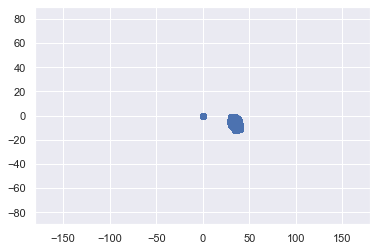

In [141]:
# plot 

plt.scatter(df_new4['longitude'], df_new4['latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

I will be engineering this on train, val, and test

In [142]:
df_train.head(3)

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered
0,63406,0.000000,2013-09-03,3.209783,36.819164,-3.180817e+00,0.0,0.477121,0.90309,2.19590,geodata_consultants_ltd,Kisimiri gravity water supply,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,41243,0.845098,2013-04-03,3.052694,37.456287,-3.344654e+00,0.0,0.602060,0.69897,1.20412,geodata_consultants_ltd,Kirua kahe gravity water supply trust,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,27575,0.000000,2013-01-22,0.000000,0.000000,-2.000000e-08,0.0,1.255273,0.30103,0.00000,geodata_consultants_ltd,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [143]:
# want to the both longitude and latitude in a dataframe

x1 = df_train.iloc[:, [4,5]]
x2 = df_val.iloc[:, [4,5]]
x3 = df_test.iloc[:, [4,5]]


In [144]:
# importing KMeans clustering from sklearn

from sklearn.cluster import KMeans

In [145]:
x1.head(3)

,longitude,latitude
0,36.819164,-3.180817e+00
1,37.456287,-3.344654e+00
2,0.000000,-2.000000e-08


Tanzania has 31 different administrative regions. 

I want to find perfect number of clusters 

In [146]:
wcss1 =[]

for i in range(1,31):
    kmeans = KMeans(i)
    kmeans.fit(x1)
    wcss_iter = kmeans.inertia_
    wcss1.append(wcss_iter)
    
wcss2 =[]

for i in range(1,31):
    kmeans = KMeans(i)
    kmeans.fit(x2)
    wcss_iter = kmeans.inertia_
    wcss2.append(wcss_iter)
    
wcss3 =[]

for i in range(1,31):
    kmeans = KMeans(i)
    kmeans.fit(x3)
    wcss_iter = kmeans.inertia_
    wcss3.append(wcss_iter)

In [147]:
wcss1

[1867637.990944938,
 505128.7676299256,
 261836.1247211012,
 152459.04038522884,
 104198.5530960427,
 85131.16261627807,
 67695.25035309023,
 57866.869539564475,
 47946.58847452521,
 40776.42349687775,
 35489.427986788745,
 31165.976121771553,
 26233.95737184566,
 22536.120011624207,
 19967.186292314684,
 18217.101046846365,
 16727.935128636982,
 15818.337006223426,
 14318.987670512193,
 13519.838211868644,
 12959.699336378144,
 12177.307775510577,
 11393.923057944685,
 10991.03665770681,
 10592.606920174607,
 9665.32073421085,
 9386.94090297618,
 8941.664177480538,
 8554.50548992327,
 8260.854205118814]

Text(0, 0.5, 'Within-cluster Sum of Squares')

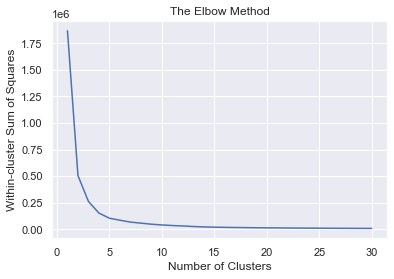

In [148]:
### wcss1 

# check the elbow method
# by plotting

number_clusters = range(1,31)
plt.plot(number_clusters, wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

Text(0, 0.5, 'Within-cluster Sum of Squares')

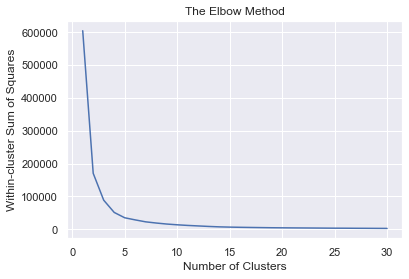

In [149]:
### wcss2 

# check the elbow method
# by plotting

number_clusters = range(1,31)
plt.plot(number_clusters, wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

Text(0, 0.5, 'Within-cluster Sum of Squares')

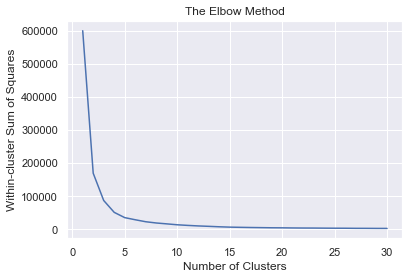

In [150]:
### wcss3 

# check the elbow method
# by plotting

number_clusters = range(1,31)
plt.plot(number_clusters, wcss3)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

I will be picking a cluster at 5

In [151]:
kmeans = KMeans(5)

In [152]:
# fitting the kmeans 

kmeans.fit(x1)

KMeans(n_clusters=5)

In [153]:
kmeans.fit(x2)

KMeans(n_clusters=5)

In [154]:
kmeans.fit(x3)

KMeans(n_clusters=5)

In [155]:
# predicting the clusters 

identified_clusters1 = kmeans.fit_predict(x1)
identified_clusters2 = kmeans.fit_predict(x2)
identified_clusters3 = kmeans.fit_predict(x3)

identified_clusters1

array([2, 2, 1, ..., 2, 0, 0], dtype=int32)

In [156]:
# supply the above result as a new feature in the dataset 

df_train['loc_cluster'] = identified_clusters1
df_val['loc_cluster'] = identified_clusters2
df_test['loc_cluster'] = identified_clusters3

In [157]:
df_train.head(3)

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,loc_cluster
0,63406,0.000000,2013-09-03,3.209783,36.819164,-3.180817e+00,0.0,0.477121,0.90309,2.19590,geodata_consultants_ltd,Kisimiri gravity water supply,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,2
1,41243,0.845098,2013-04-03,3.052694,37.456287,-3.344654e+00,0.0,0.602060,0.69897,1.20412,geodata_consultants_ltd,Kirua kahe gravity water supply trust,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,2
2,27575,0.000000,2013-01-22,0.000000,0.000000,-2.000000e-08,0.0,1.255273,0.30103,0.00000,geodata_consultants_ltd,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [158]:
df_train.loc_cluster.value_counts()

4    10231
2     9762
0     8221
3     6081
1     1108
Name: loc_cluster, dtype: int64

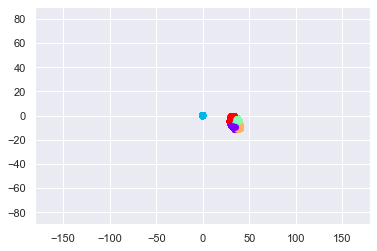

In [159]:
# plot for train dataset

plt.scatter(df_train['longitude'], df_train['latitude'], c=df_train['loc_cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [160]:
# drop longitude and latitude in all the dataset 

df_train.drop(columns=['longitude', 'latitude'], inplace=True)
df_val.drop(columns=['longitude', 'latitude'], inplace=True)
df_test.drop(columns=['longitude', 'latitude'], inplace=True)

`Transform the cluster classes to features`

In [161]:
clus_var = ['loc_cluster']
loc_classes = {}

for c in clus_var:
    loc_classes[c] = list(df_train[c].value_counts().index)

In [162]:
for c, values in loc_classes.items():
    for v in values:
        df_train['%s_%s' % (c, v)] = (df_train[c] == v).astype('int')  
        df_val['%s_%s' % (c, v)] = (df_val[c] == v).astype('int')
        df_test['%s_%s' % (c, v)] = (df_test[c] == v).astype('int')

Dropping the features

In [163]:
df_train.drop(columns=clus_var, inplace=True)
df_val.drop(columns=clus_var, inplace=True)
df_test.drop(columns=clus_var, inplace=True)

In [164]:
df_train.head(3)

,id,amount_tsh,date_recorded,gps_height,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,loc_cluster_4,loc_cluster_2,loc_cluster_0,loc_cluster_3,loc_cluster_1
0,63406,0.000000,2013-09-03,3.209783,0.0,0.477121,0.90309,2.19590,geodata_consultants_ltd,Kisimiri gravity water supply,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,41243,0.845098,2013-04-03,3.052694,0.0,0.602060,0.69897,1.20412,geodata_consultants_ltd,Kirua kahe gravity water supply trust,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,27575,0.000000,2013-01-22,0.000000,0.0,1.255273,0.30103,0.00000,geodata_consultants_ltd,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


### Feature Engineering (recorded_by)

I want to map the value of recorded by to integer 

In [165]:
df_train['recorded_by'] = df_train['recorded_by'].map({'geodata_consultants_ltd': 1})
df_val['recorded_by'] = df_val['recorded_by'].map({'geodata_consultants_ltd': 1})
df_test['recorded_by'] = df_test['recorded_by'].map({'geodata_consultants_ltd': 1})

In [166]:
df_test['recorded_by'].value_counts()

1    11801
Name: recorded_by, dtype: int64

In [167]:
df_train.head(3)

,id,amount_tsh,date_recorded,gps_height,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,loc_cluster_4,loc_cluster_2,loc_cluster_0,loc_cluster_3,loc_cluster_1
0,63406,0.000000,2013-09-03,3.209783,0.0,0.477121,0.90309,2.19590,1,Kisimiri gravity water supply,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,41243,0.845098,2013-04-03,3.052694,0.0,0.602060,0.69897,1.20412,1,Kirua kahe gravity water supply trust,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,27575,0.000000,2013-01-22,0.000000,0.0,1.255273,0.30103,0.00000,1,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


### Feature Engineering (Building a random forest model) 

I assume that 0 values in **`construction_year`** are not the right values. So, this model will be used to predict at least what could actually be the right values. 

To do:

- Return back the earlier target feature
- Join df_train, df_val, and df_test
- Transform the target variable as a label
- Split the joined dataset to train and test, based on condition where construction_year value 0
- Change the data type of construction year to category data type
- Remove some features in the dataset 
- Remove the target variable (construction_year)
- Transform the status_group
- Remove the status_group
- Train the model 
- Predict the contruction_year with the model 

In [168]:
df_train['status_group'] = y_train
df_val['status_group'] = y_val
df_test['status_group'] = y_test

In [169]:
df_train.head(3)

,id,amount_tsh,date_recorded,gps_height,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,loc_cluster_4,loc_cluster_2,loc_cluster_0,loc_cluster_3,loc_cluster_1,status_group
0,63406,0.000000,2013-09-03,3.209783,0.0,0.477121,0.90309,2.19590,1,Kisimiri gravity water supply,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2
1,41243,0.845098,2013-04-03,3.052694,0.0,0.602060,0.69897,1.20412,1,Kirua kahe gravity water supply trust,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2
2,27575,0.000000,2013-01-22,0.000000,0.0,1.255273,0.30103,0.00000,1,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [170]:
full_df = pd.concat([df_train, df_val])
full_df = pd.concat([full_df, df_test])
full_df

,id,amount_tsh,date_recorded,gps_height,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,loc_cluster_4,loc_cluster_2,loc_cluster_0,loc_cluster_3,loc_cluster_1,status_group
0,63406,0.000000,2013-09-03,3.209783,0.0,0.477121,0.903090,2.195900,1,Kisimiri gravity water supply,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2
1,41243,0.845098,2013-04-03,3.052694,0.0,0.602060,0.698970,1.204120,1,Kirua kahe gravity water supply trust,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2
2,27575,0.000000,2013-01-22,0.000000,0.0,1.255273,0.301030,0.000000,1,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,44894,2.399674,2013-01-27,3.176381,0.0,1.230449,0.477121,2.725095,1,Kishiha,1997,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,14433,0.000000,2013-02-12,3.196729,0.0,1.342423,0.477121,2.631444,1,Nameqhwadiba,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,

In [171]:
full_df = full_df.reset_index(drop=True)
full_df

,id,amount_tsh,date_recorded,gps_height,num_private,region_code,district_code,population,recorded_by,scheme_name,construction_year,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,loc_cluster_4,loc_cluster_2,loc_cluster_0,loc_cluster_3,loc_cluster_1,status_group
0,63406,0.000000,2013-09-03,3.209783,0.0,0.477121,0.903090,2.195900,1,Kisimiri gravity water supply,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2
1,41243,0.845098,2013-04-03,3.052694,0.0,0.602060,0.698970,1.204120,1,Kirua kahe gravity water supply trust,2008,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2
2,27575,0.000000,2013-01-22,0.000000,0.0,1.255273,0.301030,0.000000,1,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,44894,2.399674,2013-01-27,3.176381,0.0,1.230449,0.477121,2.725095,1,Kishiha,1997,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,14433,0.000000,2013-02-12,3.196729,0.0,1.342423,0.477121,2.631444,1,Nameqhwadiba,2011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,

Transform (label encoding) the target variable (construction_year) as a label

In [172]:
full_df['construction_year'] = full_df['construction_year'].map(
    {2013: 54, 2012: 53, 2011: 52, 2010: 51, 2009: 50, 2008: 49, 2007: 48, 2006: 47, 
     2005: 46, 2004: 45, 2003: 44, 2002: 43, 2001: 42, 2000: 41, 1999: 40, 1998: 39, 
     1997: 38, 1996: 37, 1995: 36, 1994: 35, 1993: 34, 1992: 33, 1991: 32, 1990: 31, 
     1989: 30, 1988: 29, 1987: 28, 1986: 27, 1985: 26, 1984: 25, 1983: 24, 1982: 23, 
     1981: 22, 1980: 21, 1979: 20, 1978: 19, 1977: 18, 1976: 17, 1975: 16, 1974: 15, 
     1973: 14, 1972: 13, 1971: 12, 1970: 11, 1969: 10, 1968: 9, 1967: 8, 1966: 7, 1965: 6,
     1964: 5, 1963: 4, 1962: 3, 1961: 2, 1960: 1}
)

In [173]:
full_df['construction_year'].isna().sum()

20338

From the above mapping has already classified 0 values as missing data 

Splitting the dataset 

In [174]:
# where construction_year is not 0

const_not_0 = full_df[full_df['construction_year'].notna()]
print("N. rows with construction year not 0:", const_not_0.shape[0])

N. rows with construction year not 0: 38667


In [175]:
# where construction_year is 0

const_is_0 = full_df[full_df['construction_year'].isna()]
print("N. rows with construction year 0:", const_is_0.shape[0])

N. rows with construction year 0: 20338


Change the data type of construction year to category data type

In [176]:
const_is_0.construction_year.dtype

dtype('float64')

In [177]:
const_not_0['construction_year'] = const_not_0.construction_year.astype(int)
const_is_0['construction_year'] = const_not_0.construction_year.astype(int)

<ipython-input-177-3c001e8429e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  const_not_0['construction_year'] = const_not_0.construction_year.astype(int)
<ipython-input-177-3c001e8429e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  const_is_0['construction_year'] = const_not_0.construction_year.astype(int)


In [178]:
const_not_0['construction_year'] = const_not_0.construction_year.astype('category')
const_is_0['construction_year'] = const_is_0.construction_year.astype('category')

<ipython-input-178-027cbde8346b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  const_not_0['construction_year'] = const_not_0.construction_year.astype('category')
<ipython-input-178-027cbde8346b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  const_is_0['construction_year'] = const_is_0.construction_year.astype('category')


In [179]:
# reset and drop the index 

const_is_0 = const_is_0.reset_index(drop=True)
const_not_0 = const_not_0.reset_index(drop=True)

Setting the construction year as target variable

In [180]:
y_const_is_0 = const_is_0.construction_year.values
y_const_not_0 = const_not_0.construction_year.values

Get a dataframe for 'id','construction_year','date_recorded', and 'scheme_name'

In [181]:
df1_not_0 = const_not_0[['id','construction_year','date_recorded', 'scheme_name']]
df2_is_0 = const_is_0[['id','construction_year','date_recorded', 'scheme_name']]

Removing some features that would not be relevant to the model building 

In [182]:
feat_drop = ['id','construction_year','date_recorded', 'scheme_name']

X_const_is_0 = const_is_0.drop(columns=feat_drop)
X_const_not_0 = const_not_0.drop(columns=feat_drop)

Transform the status_group

In [183]:
status_var = ['status_group']
status_classes = {}

for c in status_var:
    status_classes[c] = list(X_const_is_0[c].value_counts().index)

In [184]:
for c, values in status_classes.items():
    for v in values:
        X_const_not_0['%s_%s' % (c, v)] = (X_const_not_0[c] == v).astype('int')  
        X_const_is_0['%s_%s' % (c, v)] = (X_const_is_0[c] == v).astype('int')

Dropping the status_group feature

In [185]:
X_const_not_0.drop(columns=status_var, inplace=True)
X_const_is_0.drop(columns=status_var, inplace=True)

In [186]:
X_const_not_0.shape, X_const_is_0.shape

((38667, 123), (20338, 123))

Training a Random Forest model

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

X = X_const_not_0
y = y_const_not_0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, 
                                max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_const_pred_train = forest.predict(X_train)
y_const_pred = forest.predict(X_test)

y_const_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(y_train, y_const_pred_train)
accuracy_test = accuracy_score(y_test, y_const_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))

ACCURACY: TRAIN=0.7965 TEST=0.5958


Now that we have the model, I want fill the 2nd dataframe (where construction_year is null values) with the values of the prediction.

In [188]:
prediction = forest.predict(X_const_is_0)

X_const_is_0.insert(0, 'construction_year', prediction)

Joining the contruction year (y_const_not_0) back to X_const_not_0

In [189]:
X_const_not_0['construction_year'] = y_const_not_0

Returning the dropped features 

In [190]:
df1_not_0 = df1_not_0.drop('construction_year', axis=1)
df2_is_0 = df2_is_0.drop('construction_year', axis=1)

In [191]:
df_merged_not_0 = pd.concat([df1_not_0, X_const_not_0], axis=1)
df_merged_is_0 = pd.concat([df2_is_0, X_const_is_0], axis=1)

I want to merge the two dataframes

In [192]:
frames = [df_merged_not_0, df_merged_is_0]
df_final = pd.concat(frames)

In [193]:
df_final.shape

(59005, 127)

Returning construction year back to it's original values 

In [194]:
df_final['construction_year'] = df_final['construction_year'].map(
    {54: 2013, 53: 2012, 52: 2011, 51: 2010, 50: 2009, 49: 2008, 48: 2007, 47: 2006, 
     46: 2005, 45: 2004, 44: 2003, 43: 2002, 42: 2001, 41: 2000, 40: 1999, 39: 1998, 
     38: 1997, 37: 1996, 36: 1995, 35: 1994, 34: 1993, 33: 1992, 32: 1991, 31: 1990, 
     30: 1989, 29: 1988, 28: 1987, 27: 1986, 26: 1985, 25: 1984, 24: 1983, 23: 1982, 
     22: 1981, 21: 1980, 20: 1979, 19: 1978, 18: 1977, 17: 1976, 16: 1975, 15: 1974, 
     14: 1973, 13: 1972, 12: 1971, 11: 1970, 10: 1969, 9: 1968, 8: 1967, 7: 1966, 6: 1965,
     5: 1964, 4: 1963, 3: 1962, 2: 1961, 1: 1960}
)

###  Feature Engineering (date_recorded)

I want to assume that the date the record was imported, the water-pumps are still standing. So, I will be engineering another feature from both `construction_year` and `date_recorded`. The new features will be called **`water_pump_age`**

To do:
- Extract year from date_recorded (recorded_year)
- Drop date_recorded
- Get water_pump_age, where (recorded_year - construction_year)
- Drop recorded_year and construction_year

In [195]:
# extracting the year 
df_final['recorded_year'] = df_final['date_recorded'].dt.year

In [196]:
# get the water_pump_age 

df_final['water_pump_age'] = df_final['recorded_year'] - df_final['construction_year']

In [197]:
# drop construction_year, recorded_year, and date_recorded
df_final = df_final.drop(columns=['construction_year', 'recorded_year', 'date_recorded'])

In [198]:
df_final = df_final.reset_index(drop=True)

### Data Progressing (Update)

If check the features information, you'll see that both **scheme_name** and **scheme_manegement** pass similar information. Going forward, rather than cleaning scheme_name(missing values), it will be dropped and use scheme_management in place of it.  

In [199]:
df_final = df_final.drop('scheme_name', axis=1)

I want to merge `df_final and df_status_id` on `id's`

In [200]:
df_final_updated = pd.merge(df_final, df_status_id, on='id')
df_final_updated.head()

,id,amount_tsh,gps_height,num_private,region_code,district_code,population,recorded_by,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,loc_cluster_4,loc_cluster_2,loc_cluster_0,loc_cluster_3,loc_cluster_1,status_group_2,status_group_0,status_group_1,water_pump_age,status_group
0,63406,0.000000,3.209783,0.0,0.477121,0.903090,2.195900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,7,2
1,41243,0.845098,3.052694,0.0,0.602060,0.698970,1.204120,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,5,2
2,44894,2.399674,3.176381,0.0,1.230449,0.477121,2.725095,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,16,1
3,14433,0.000000,3.196729,0.0,1.342423,0.477121,2.631444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,2
4,64705,1.322219,0.000000,0.0,0.845098,0.301030,1.908485,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,18,0


In [201]:
df_final_updated.shape

(59005, 126)

I want drop;
   - id
   - status_group_2
   - status_group_0
   - status_group_1

In [202]:
df_final_updated = df_final_updated.drop(columns=['id', 'status_group_2', 'status_group_0', 'status_group_1'])

In [203]:
df_final_updated.head(3)

,amount_tsh,gps_height,num_private,region_code,district_code,population,recorded_by,funder_government_of_tanzania,funder_missing,funder_danida,funder_hesawa,funder_rwssp,funder_kkkt,funder_world_bank,funder_world_vision,funder_unicef,funder_tasaf,installer_dwe,installer_missing,installer_government,installer_hesawa,installer_rwe,installer_danida,installer_district_council,installer_kkkt,installer_commu,wpt_name_none,wpt_name_shuleni,wpt_name_zahanati,wpt_name_msikitini,wpt_name_kanisani,wpt_name_bombani,wpt_name_sokoni,wpt_name_ofisini,wpt_name_school,wpt_name_shule_ya_msingi,subvillage_madukani,subvillage_shuleni,subvillage_majengo,subvillage_kati,subvillage_mtakuja,subvillage_sokoni,subvillage_m,subvillage_muungano,subvillage_mbuyuni,subvillage_mlimani,lga_njombe,lga_arusha_rural,lga_moshi_rural,lga_bariadi,lga_rungwe,lga_kilosa,lga_kasulu,lga_mbozi,lga_meru,lga_bagamoyo,scheme_management_vwc,scheme_management_wug,scheme_management_missing,scheme_management_water_authority,scheme_management_wua,scheme_management_water_board,scheme_management_parastatal,scheme_management_private_operator,scheme_management_company,basin_lake_victoria,basin_pangani,basin_rufiji,basin_internal,basin_lake_tanganyika,basin_wami_/_ruvu,basin_lake_nyasa,basin_ruvuma_/_southern_coast,basin_lake_rukwa,public_meeting_true,public_meeting_false,permit_true,permit_false,management_group_user-group,management_group_commercial,management_group_parastatal,payment_never_pay,payment_pay_per_bucket,payment_pay_monthly,payment_unknown,payment_pay_when_scheme_fails,payment_pay_annually,payment_other,water_quality_soft,water_quality_salty,water_quality_unknown,quality_group_good,quality_group_salty,quantity_group_enough,quantity_group_insufficient,quantity_group_dry,quantity_group_seasonal,source_type_spring,source_type_shallow_well,source_type_borehole,source_type_river/lake,source_type_rainwater_harvesting,source_type_dam,source_class_groundwater,source_class_surface,waterpoint_type_group_communal_standpipe,waterpoint_type_group_hand_pump,waterpoint_type_group_other,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_class_motorpump,extraction_type_class_rope_pump,extraction_type_class_wind-powered,loc_cluster_4,loc_cluster_2,loc_cluster_0,loc_cluster_3,loc_cluster_1,water_pump_age,status_group
0,0.000000,3.209783,0.0,0.477121,0.903090,2.195900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,7,2
1,0.845098,3.052694,0.0,0.602060,0.698970,1.204120,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5,2
2,2.399674,3.176381,0.0,1.230449,0.477121,2.725095,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,16,1


## Model Building 

Here, I start the building processes. I will be building three classifier models:
- Random Forest 
- Gradient Boosting (xgboost)
- Logistic Reression 

### Random Forest

To do:
- import random forest
- Convert the target variable to category dtype
- Splitting the dataset train, val, and test (60%, 20%, 20%)
- Transform the datasets using vectorizer 
- Train the model
- Evaluate the model on validation set 
- Hyper tune the parameters
- Get the most efficient parameters 
- Train the model again
- Evaluate the model 

In [204]:
df_final_updated['status_group'] = df_final_updated['status_group'].map({2: 'functional', 
                                                                         1: 'functional_needs_repair', 
                                                                         0: 'non_functional'})

In [205]:
df_final_updated['status_group'] = df_final_updated['status_group'].astype('category')

In [206]:
X = df_final_updated.drop('status_group', axis=1)
y = df_final_updated.status_group.values

In [207]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#I will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_
classes

array(['functional', 'functional_needs_repair', 'non_functional'],
      dtype=object)

In [208]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=11)

In [209]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve,auc

Normalising the data

In [210]:
# turn the dataset to dict

train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

In [211]:
# initialize the vectorizer

dv = DictVectorizer(sparse=False)

# fit and transform the dictionaries with vectorizer

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [212]:
# get the feature names after transforming

dv.get_feature_names()

['amount_tsh',
 'basin_internal',
 'basin_lake_nyasa',
 'basin_lake_rukwa',
 'basin_lake_tanganyika',
 'basin_lake_victoria',
 'basin_pangani',
 'basin_rufiji',
 'basin_ruvuma_/_southern_coast',
 'basin_wami_/_ruvu',
 'district_code',
 'extraction_type_class_gravity',
 'extraction_type_class_handpump',
 'extraction_type_class_motorpump',
 'extraction_type_class_other',
 'extraction_type_class_rope_pump',
 'extraction_type_class_submersible',
 'extraction_type_class_wind-powered',
 'funder_danida',
 'funder_government_of_tanzania',
 'funder_hesawa',
 'funder_kkkt',
 'funder_missing',
 'funder_rwssp',
 'funder_tasaf',
 'funder_unicef',
 'funder_world_bank',
 'funder_world_vision',
 'gps_height',
 'installer_commu',
 'installer_danida',
 'installer_district_council',
 'installer_dwe',
 'installer_government',
 'installer_hesawa',
 'installer_kkkt',
 'installer_missing',
 'installer_rwe',
 'lga_arusha_rural',
 'lga_bagamoyo',
 'lga_bariadi',
 'lga_kasulu',
 'lga_kilosa',
 'lga_mbozi',
 'lg

In [213]:
rf=OneVsRestClassifier(RandomForestClassifier(n_estimators=10, random_state=1))
rf.fit(X_train,y_train)
y_pred =rf.predict(X_val)
pred_prob = rf.predict_proba(X_val)

In [214]:
pred_prob.shape

(11801, 3)

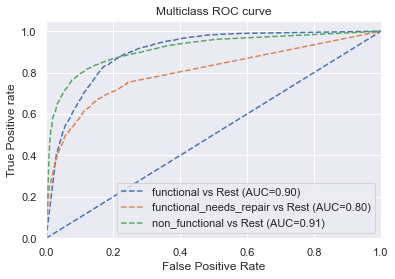

In [215]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_val_binarized=label_binarize(y_val,classes=np.unique(y_val))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

# plotting the roc curve 
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [216]:
# Let's check the roc auc score 

roc_auc_score(y_val_binarized, pred_prob)

0.8727823123754007

In [217]:
y_val_binarized

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

The model performed better on when `non_functional class` is compare with rest of the classes. Also, `functional class` perform better when compare with rest of the classes. However, `functional_needs_repair class` perform less than the two ther classes when it's compare to them. This might be because there is imbalance between it and other classes. 

Going forward, I want to hypertune the parameters to find the best point 

#### Random Forest Hyper Parameters Tuning 

**N_estimators**

In [218]:
# trying different number of n_estimators

scores = []

for n in range(10, 101, 10):
    rf=OneVsRestClassifier(RandomForestClassifier(n_estimators=n, random_state=1))
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict(X_val)
    pred_prob = rf.predict_proba(X_val)
    
    y_val_binarized=label_binarize(y_val,classes=np.unique(y_val))
    
    auc = roc_auc_score(y_val_binarized, pred_prob)
    
    scores.append((n, auc))

KeyboardInterrupt: 

In [ ]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [ ]:
df_scores

In [ ]:
# plot the above 

plt.plot(df_scores.n_estimators, df_scores.auc)

**n_estimator and max_depth**

In [ ]:
# trying different number of n_estimators
# trying different number of max_depth

scores = []

for d in [5, 10, 15, 20, 25]:
    for n in range(10, 101, 10):
        rf=OneVsRestClassifier(RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1))
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        pred_prob = rf.predict_proba(X_val)
        
        y_val_binarized=label_binarize(y_val,classes=np.unique(y_val))
    
        auc = roc_auc_score(y_val_binarized, pred_prob)

        scores.append((d, n, auc))

In [ ]:
df_scores = pd.DataFrame(scores, 
                         columns=['max_depth', 
                                  'n_estimators',
                                  'auc'])
df_scores

In [ ]:
# plot the above 

for d in [5, 10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, 
             df_subset.auc, 
             label='max_depth=%d' % d)
plt.legend()

You would see that the model performs better when the `max_depth` parameter was in default ('none') than when I set a rather of it's depth. It is a worthy of note that the model train/learn slower when I max_depth range. Going forward, max_depth default will be adopted. 

**n_estimator and min_samples_leaf**

In [ ]:
# trying different number of n_estimators
# trying different number of min_samples_leaf
max_depth = 20
scores = []

for s in [1, 3, 5, 10, 20, 25, 50]:
    for n in range(10, 101, 10):
        rf=OneVsRestClassifier(RandomForestClassifier(n_estimators=n, 
                                                      min_samples_leaf=s,
                                                      max_depth= max_depth,
                                                      random_state=1))
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        pred_prob = rf.predict_proba(X_val)
        
        y_val_binarized=label_binarize(y_val,classes=np.unique(y_val))
    
        auc = roc_auc_score(y_val_binarized, pred_prob)

        scores.append((s, n, auc))

In [ ]:
df_scores = pd.DataFrame(scores, 
                         columns=['min_samples_leaf', 
                                  'n_estimators',
                                  'auc'])
df_scores[60:]

In [ ]:
# plot the above 

for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, 
             df_subset.auc, 
             label='min_samples_leaf=%s' % s)
plt.legend()

The best parameters that I would be using going forward after that hyperparameter tuning processes are where:
- min_samples_leaf = 1
- max_depth = 20
- n_estimator = 80

**Final Random Forest model**

In [219]:
rf=OneVsRestClassifier(RandomForestClassifier(n_estimators=80,
                                              min_samples_leaf=1,
                                              max_depth=20,
                                              random_state=1))
rf.fit(X_train,y_train)
y_pred =rf.predict(X_val)
pred_prob = rf.predict_proba(X_val)

In [220]:
pred_prob.shape

(11801, 3)

No handles with labels found to put in legend.


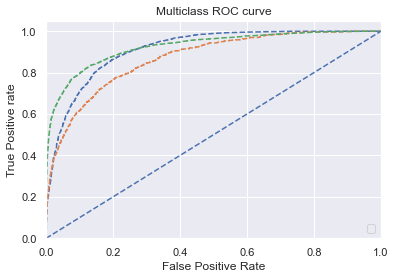

In [236]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_val_binarized=label_binarize(y_val,classes=np.unique(y_val))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

# plotting the roc curve 
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_binarized[:,i], pred_prob[:,i])
    #roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--')
             #label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [237]:
# Let's check the roc auc score 

roc_auc_score(y_val_binarized, pred_prob)

0.9022659968913486

We can see improvement in the mode performance. So, I will be training another model, which will help in comparing the most performed of all trained models 

### Gradient Boosting (xgboost)

To do:
- Import xgboost  
- Train the model
- Evaluate the model on validation set 
- Hyper tune the parameters using RandomSearchCV
- Get the most efficient parameters 
- Train the final model based on chosen parameters 
- Evaluate the model 

**Baseline xgboost model before hyperparamter tuning**

In [373]:
import xgboost as xgb

In [374]:
clf = xgb.XGBClassifier()

In [378]:
y_train_binarized=label_binarize(y_train,classes=np.unique(y_train))
y_val_binarized=label_binarize(y_val,classes=np.unique(y_val))

In [390]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_xg_pred_prob = clf.predict_proba(X_val)
print('Accuracy on validation data: {:.1f}%'.format(accuracy_score(y_val, clf.predict(X_val))*100))

Accuracy on validation data: 81.1%


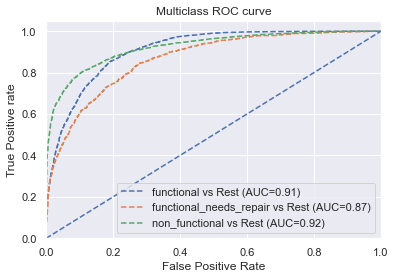

In [391]:
y_val_binarized=label_binarize(y_val,classes=np.unique(y_val))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

# plotting the roc curve 
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_binarized[:,i], y_xg_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [392]:
roc_auc_score(y_val_binarized, y_xg_pred_prob)

0.8994990145448272

#### Hyperparameter Optimization for Xgboost using RandomizedSearchCV

In [317]:
from sklearn.model_selection import RandomizedSearchCV

In [425]:
params ={
    'learning_rate': [0.05, 0.10, 0.15, 0.20],
    'max_depth': [3, 4, 5, 6, 8, 10, 12],
    'min_child_weight': [1, 3, 5, 7, 10],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'nthread': [8], 
    'seed': [1, 2],
}

In [394]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds. ' % (thour, tmin, round(tsec, 2)))

In [426]:
xgb_classifier = xgb.XGBClassifier()

In [427]:
random_search = RandomizedSearchCV(xgb_classifier, 
                                   param_distributions=params, 
                                   n_iter=5, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   cv=5,
                                   verbose=3)

In [428]:
from datetime import datetime 

# starting time 
start_time = timer(None)
random_search.fit(X_train, y_train)
# ending time 
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 22 minutes and 20.85 seconds. 


In [429]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=2, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [430]:
random_search.best_params_

{'seed': 2,
 'nthread': 8,
 'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.6,
 'colsample_bytree': 0.3}

**Training the model after tuning**

In [431]:
xgb_classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=2, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [432]:
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_val)
y_xg_pred_prob = xgb_classifier.predict_proba(X_val)
print('Accuracy on validation data: {:.1f}%'.format(accuracy_score(y_val, xgb_classifier.predict(X_val))*100))

Accuracy on validation data: 78.6%


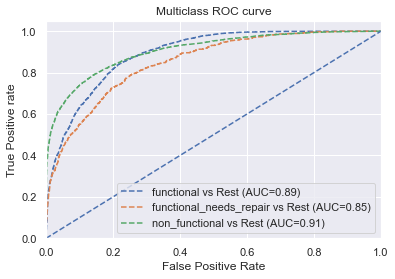

In [433]:
y_val_binarized=label_binarize(y_val,classes=np.unique(y_val))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

# plotting the roc curve 
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_val_binarized[:,i], y_xg_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [434]:
roc_auc_score(y_val_binarized, y_xg_pred_prob)

0.8828722144301092

The model performed better when it was not tuned. 

### Logistic Regression

In [435]:
from sklearn.linear_model import LogisticRegression

In [436]:
log_model = LogisticRegression(solver='liblinear', random_state=1)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [437]:
log_y_pred = log_model.predict_proba(X_val)

In [438]:
roc_auc_score(y_val_binarized, log_y_pred)

0.8179342161029144

In [439]:
params ={
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 0.3, 0.5, 7, 1, 10, 100]
}

In [440]:
random_search = RandomizedSearchCV(log_model, 
                                   param_distributions=params, 
                                   n_iter=5, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   cv=5,
                                   verbose=3)

In [441]:
from datetime import datetime 

# starting time 
start_time = timer(None)
random_search.fit(X_train, y_train)
# ending time
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 2 minutes and 4.69 seconds. 


In [442]:
random_search.best_estimator_

LogisticRegression(C=0.5, random_state=1, solver='liblinear')

In [443]:
log_model = LogisticRegression(C=0.5, random_state=1, solver='liblinear')
log_model.fit(X_train, y_train)

LogisticRegression(C=0.5, random_state=1, solver='liblinear')

In [444]:
log_y_pred = log_model.predict_proba(X_val)

In [445]:
roc_auc_score(y_val_binarized, log_y_pred)

0.8176945476756977

Judging from the performance of all the models built, we can see that the most performed of all is **`Random Forest (rf).`** 

I will be training the model again on `X_full_train` and evaluate it on the test set 

Normalising the data

In [238]:
# turn the dataset to dict

train_dicts = X_full_train.to_dict(orient='records')

In [239]:
# initialize the vectorizer

dv = DictVectorizer(sparse=False)

# fit and transform the dictionaries with vectorizer

X_train = dv.fit_transform(train_dicts)

In [240]:
# get the feature names after transforming

dv.get_feature_names()

['amount_tsh',
 'basin_internal',
 'basin_lake_nyasa',
 'basin_lake_rukwa',
 'basin_lake_tanganyika',
 'basin_lake_victoria',
 'basin_pangani',
 'basin_rufiji',
 'basin_ruvuma_/_southern_coast',
 'basin_wami_/_ruvu',
 'district_code',
 'extraction_type_class_gravity',
 'extraction_type_class_handpump',
 'extraction_type_class_motorpump',
 'extraction_type_class_other',
 'extraction_type_class_rope_pump',
 'extraction_type_class_submersible',
 'extraction_type_class_wind-powered',
 'funder_danida',
 'funder_government_of_tanzania',
 'funder_hesawa',
 'funder_kkkt',
 'funder_missing',
 'funder_rwssp',
 'funder_tasaf',
 'funder_unicef',
 'funder_world_bank',
 'funder_world_vision',
 'gps_height',
 'installer_commu',
 'installer_danida',
 'installer_district_council',
 'installer_dwe',
 'installer_government',
 'installer_hesawa',
 'installer_kkkt',
 'installer_missing',
 'installer_rwe',
 'lga_arusha_rural',
 'lga_bagamoyo',
 'lga_bariadi',
 'lga_kasulu',
 'lga_kilosa',
 'lga_mbozi',
 'lg

In [241]:
n_est=80

In [242]:
# defining a function for training

def train(df_train, y_train, n_est=80):
    train_dicts = X_full_train.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    
    rf_model=OneVsRestClassifier(RandomForestClassifier(n_estimators=n_est,
                                                  min_samples_leaf=1,
                                                  max_depth=20,
                                                  random_state=1))
    rf_model.fit(X_train,y_full_train)
    
    return dv, rf_model

In [243]:
# defining a function for testing 

def predict(df, dv, rf_model):
    
    X = dv.transform(test_dicts)
    y_pred = rf_model.predict_proba(X)
    
    return y_pred

In [244]:
from sklearn.model_selection import KFold

In [245]:
dv, rf_model = train(X_full_train, y_train, n_est=80)

In [246]:
y_pred = predict(X_test, dv, rf_model)

In [247]:
from sklearn.preprocessing import label_binarize
# binarize the y_test
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

auc = roc_auc_score(y_test_binarized, y_pred)
auc

0.9129212478027711

With this result, I can then proceed to put this model in production. 

# Deployment of the model

## Saving the model

I will be using pickle to save the model 

In [248]:
# Importing pickle 

import pickle 

In [249]:
output_file = f'model_n_est={n_est}.bin'
output_file

'model_n_est=80.bin'

Opening and closing the model file 

In [250]:
f_out = open(output_file, 'wb')
pickle.dump((dv, rf_model), f_out)
f_out.close()

In [251]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, rf_model), f_out)

Loading the model

In [1]:
import pickle

In [2]:
model_file = 'model_n_est=80.bin'

In [3]:
with open(model_file, 'rb') as f_in:
    (dv, rf_model) = pickle.load(f_in)

In [4]:
dv, rf_model

(DictVectorizer(sparse=False),
 OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                      n_estimators=80,
                                                      random_state=1)))

In [14]:
water_pump_info = {
    'amount_tsh': 3.556423,
    'gps_height': 2.954243, 
    'num_private': 0.0, 
    'region_code': 1.230449,
    'district_code': 0.602060, 
    'population': 2.741152, 
    'recorded_by': 1,
    'funder': 'government_of_tanzania',
    'installer': 'missing',
    'wpt_name': 'sokoni',
    'subvillage': 'mtakuja',
    'lga': 'njombe',
    'scheme_management': 'water_board',
    'basin_lake': 'lake_tanganyika',
    'public_meeting': 'true',
    'permit': 'true',
    'management_group': 'user-group',
    'payment': 'pay_annually',
    'water_quality': 'soft',
    'quality_group': 'good',
    'quantity_group': 'enough',
    'source_type': 'dam',
    'waterpoint_type_group': 'communal_standpipe',
    'extraction_type_class': 'gravity',
    'loc_cluster': 3,
    'water_pump_age': 16
}

In [15]:
X = dv.transform([water_pump_info])

In [16]:
rf_model.predict_proba(X)

array([[0.63340085, 0.06189702, 0.30470213]])

I will be checking water pumps that are functioning, but need repairs. This class falls at `column (1)`

In [ ]:
rf_model.predict_proba(X)[0, 1]

I want to put this in a python script 

The result of the request by Taarifa Service from the Water-Pump-Status-Service will determine what action that will be taken by Taarifa. 

The result will have three actions;
- Send technicians to the place where the water is situated FOR REPAIR (since the result of the model says the water-pump is functioning but needs repair) ==> More emphasis will be placed on this.
- Acquired new water pump (since the result of the model says the water-pump is total damage)
- Do nothing (since the result of the model says the water-pump is functioning and needs no repair)

To do:
- Put the water-pump model in **`WEB SERVICE (flask)`** ==> framework for creating web service in python 
- Isolate the model that we put in Flask web service by using **`ENVIRONMENT FOR PYTHON DEPENDENCIES (PIPENV)`**
- Put our pipenv in **`SYSTEM ENVIRONMENT DEPENCIES`** using **`DOCKER CONTAINER`**
- Deploy the docker container in **`CLOUD SERVICE`** using **`AWS ELASTIC BEANSTALK`**